### Import Packages and Clean

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import geopandas as gpd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from time import strptime
import os 
import patsy 
from shapely.wkt import loads
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pickle

In [2]:
pkl_in_temp = open('tempems_pkl_021120', 'rb')

df = pickle.load(pkl_in_temp)

### Maps

In [3]:
#https://www.census.gov/content/dam/Census/topics/research/2019_Tract_PDBDocumentationV6.pdf

In [4]:
tot_ems = df.groupby('tract').sum()
tot_ems = tot_ems['ems_calls']

In [5]:
len(df.tract.unique())

36

In [6]:
key = df.filter(['tract', 'geometry'])

In [7]:
key.drop_duplicates(inplace=True)

In [8]:
key.shape

(36, 2)

In [9]:
tot_ems = key.merge(tot_ems, on='tract')

Text(0.5, 1.0, '2017-2019 EMS Calls by Census Tract in Tempe, AZ')

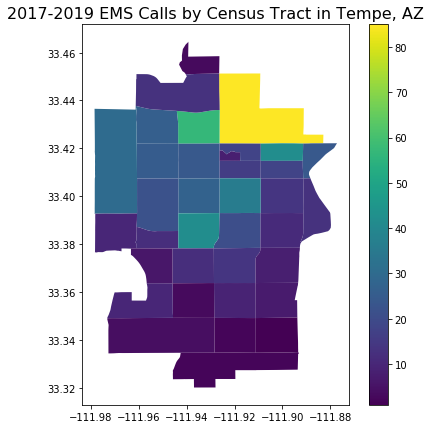

In [10]:
fig, ax = plt.subplots(figsize=(7,7))
tot_ems.plot(column='ems_calls', ax=ax, legend=True)
plt.title('2017-2019 EMS Calls by Census Tract in Tempe, AZ' , size=16)

Text(0.5, 1.0, 'PCT Males by Census Tract in Tempe, AZ')

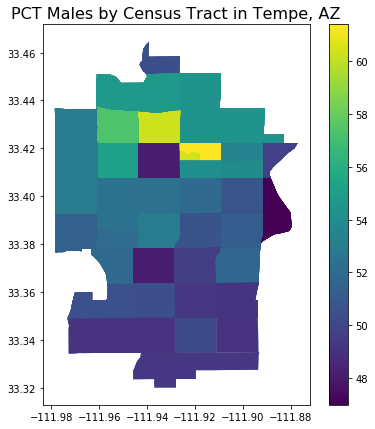

In [11]:
fig, ax = plt.subplots(figsize=(7,7))
df.plot(column='pdb2018trv4_us_csv_pct_Males_CE', ax=ax, legend=True)
plt.title('PCT Males by Census Tract in Tempe, AZ' , size=16)

Text(0.5, 1.0, 'Pct Homeowners by Census Tract in Tempe, AZ')

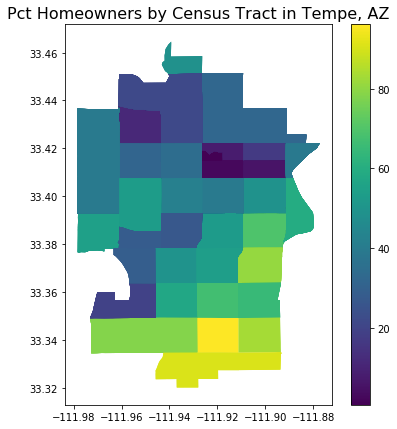

In [12]:
fig, ax = plt.subplots(figsize=(7,7))
df.plot(column='pdb2018trv4_us_csv_pct_Owner__1', ax=ax, legend=True)
plt.title('Pct Homeowners by Census Tract in Tempe, AZ' , size=16)

Text(0.5, 1.0, 'Median HHI by Census Tract in Tempe, AZ')

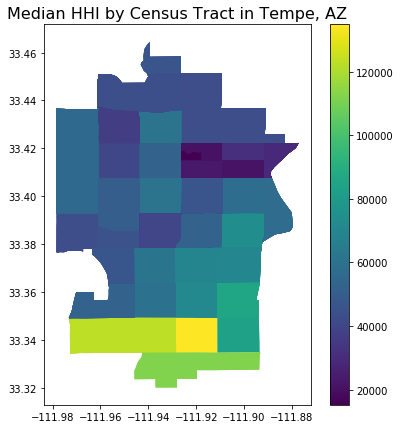

In [13]:
fig, ax = plt.subplots(figsize=(7,7))
df.plot(column='pdb2018trv4_us_csv_Med_HHD_Inc_', ax=ax, legend=True)
plt.title('Median HHI by Census Tract in Tempe, AZ' , size=16)

/Users/drewgobbi/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Text(0.5, 1.0, 'Median Home Value by Census Tract in Tempe, AZ')

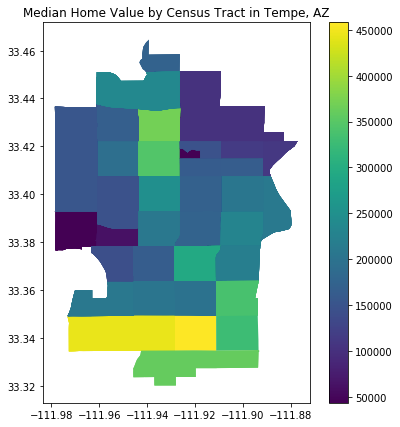

In [14]:
fig, ax = plt.subplots(figsize=(7,7))
df.plot(column='pdb2018trv4_us_csv_Med_House_Va', ax=ax, legend=True)
plt.title('Median Home Value by Census Tract in Tempe, AZ' , size=12)

Text(0.5, 1.0, 'PCT College, AZ')

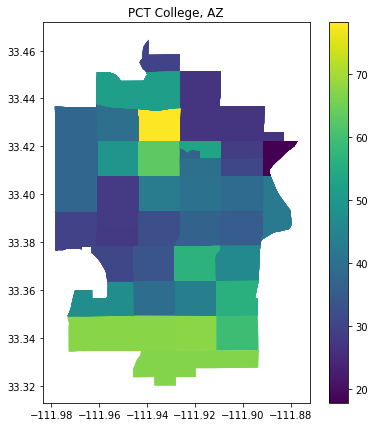

In [15]:
fig, ax = plt.subplots(figsize=(7,7))
df.plot(column='pdb2018trv4_us_csv_pct_College_', ax=ax, legend=True)
plt.title('PCT College, AZ' , size=12)

### Check Histograms

In [16]:
var = ['Shape__Area', 'Shape__Length', 'Unnamed: 0', 'TempeTracts_Name']
for i in range(len(df.columns[0:22])):
    var.append(df.columns[i])

In [17]:
for i in range(len(df.columns[-18:-1])):
    var.append(df.columns[i])

In [18]:
test_shapes = df
test_shapes.drop(var, axis=1 ,inplace=True)

In [19]:
features = test_shapes.columns 

In [20]:
test_shapes = test_shapes.select_dtypes(include=['float64', 'int64'])

/Users/drewgobbi/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyError: 'geometry'

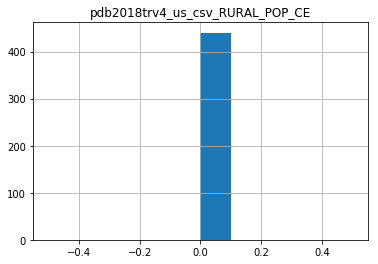

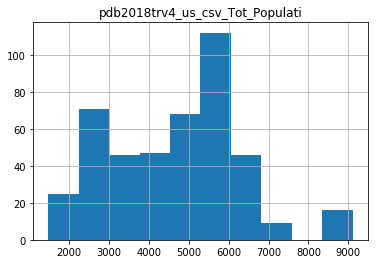

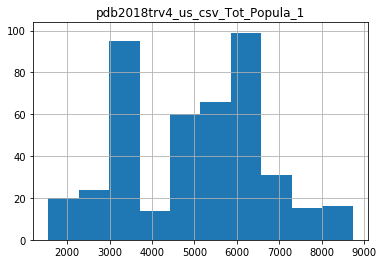

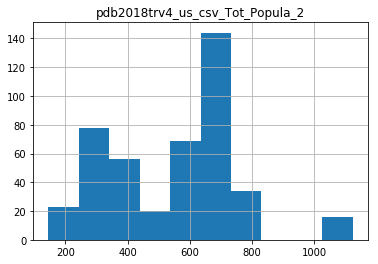

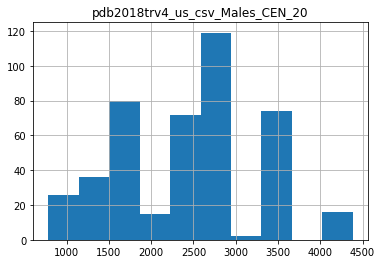

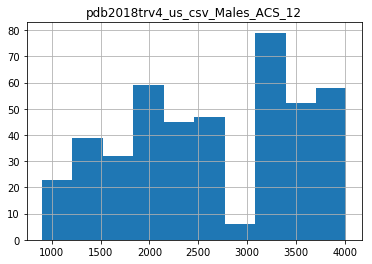

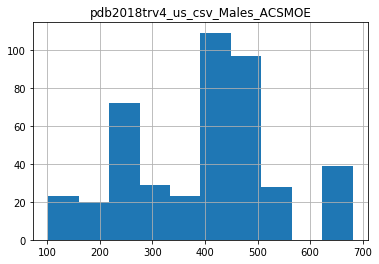

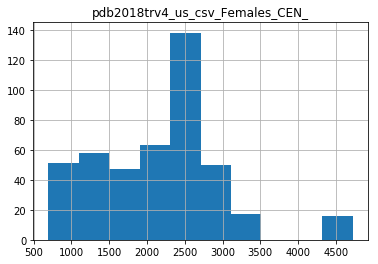

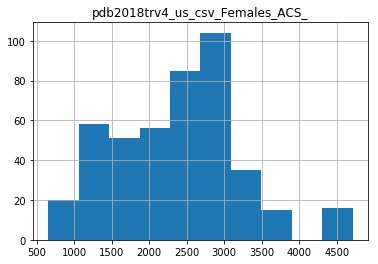

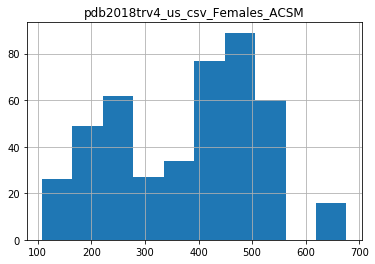

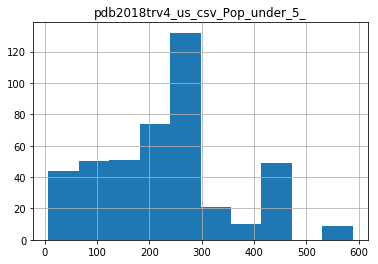

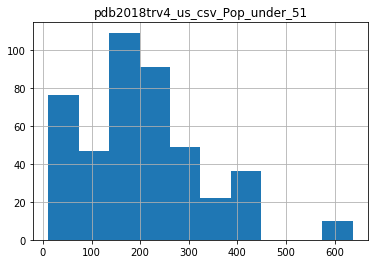

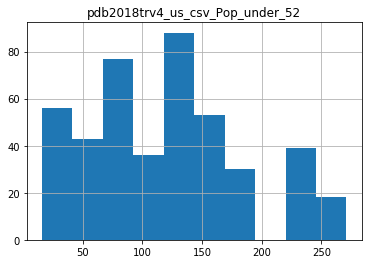

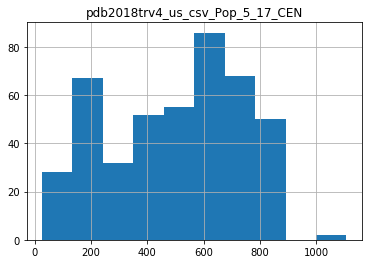

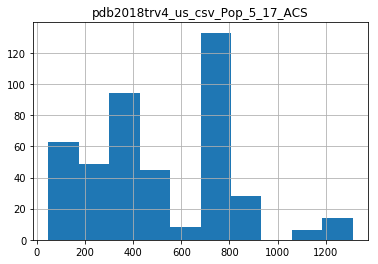

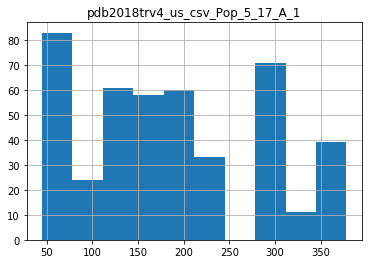

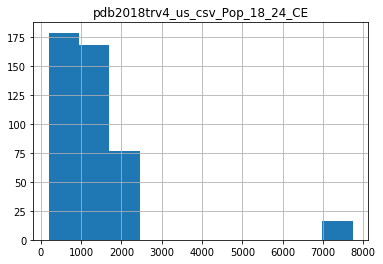

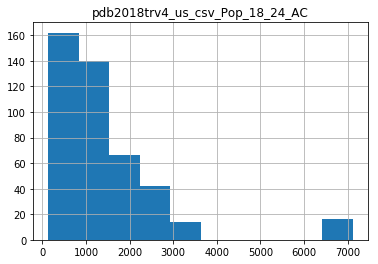

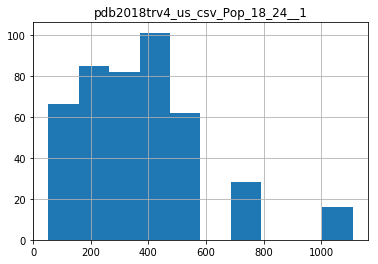

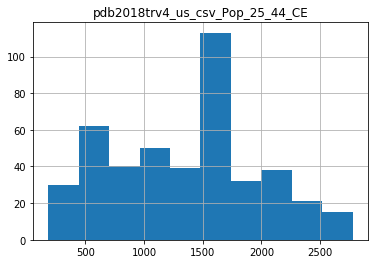

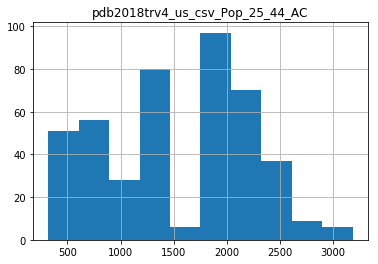

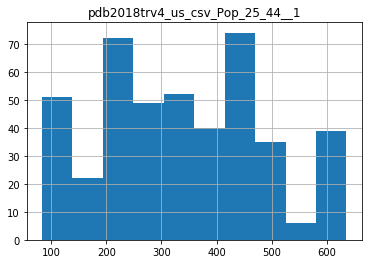

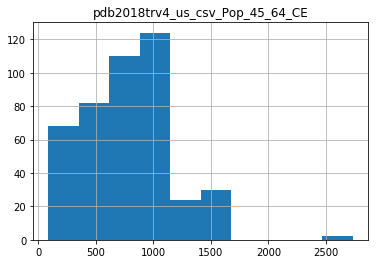

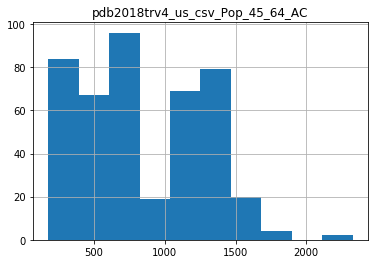

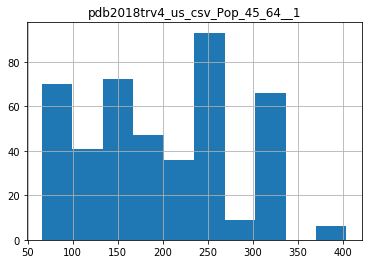

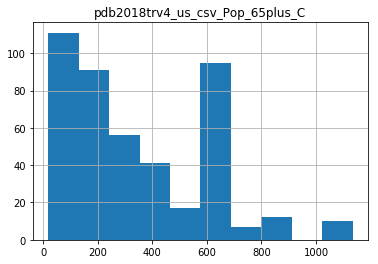

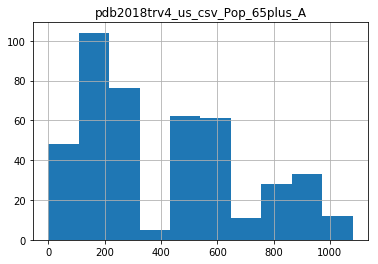

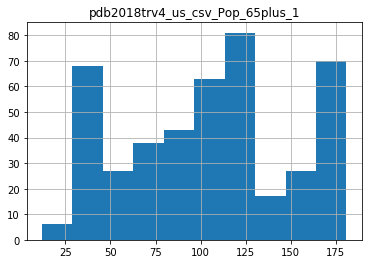

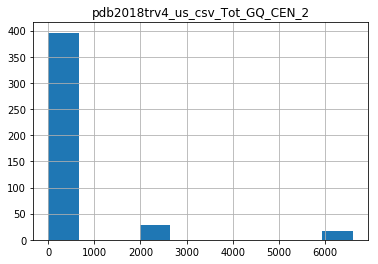

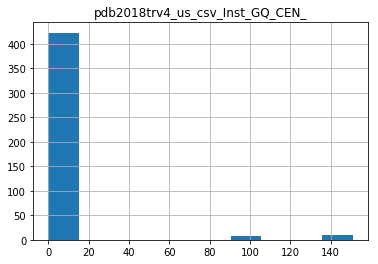

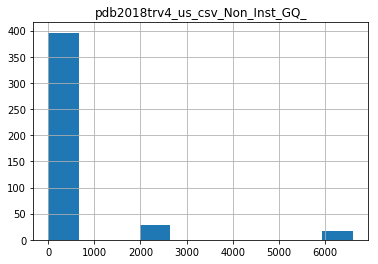

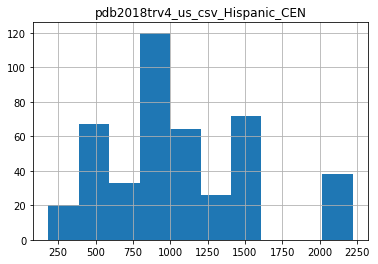

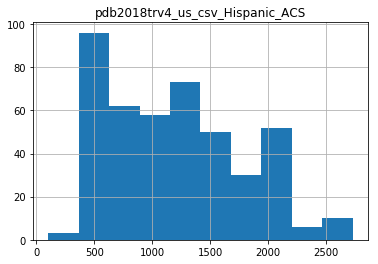

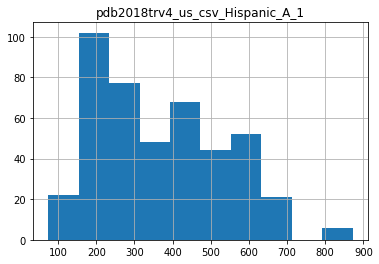

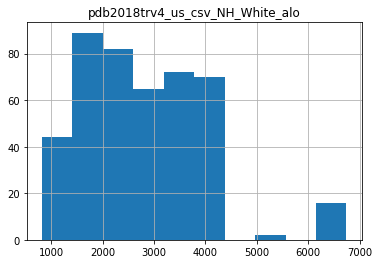

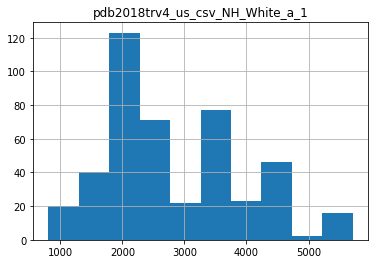

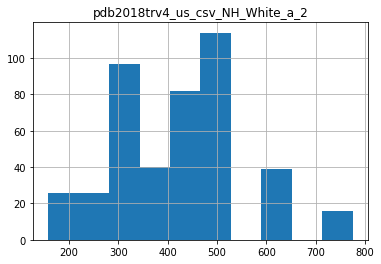

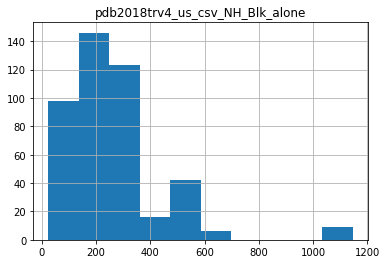

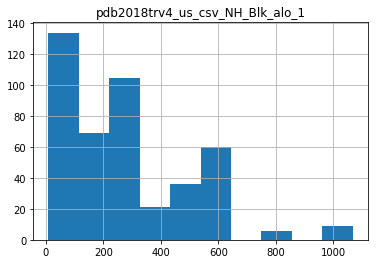

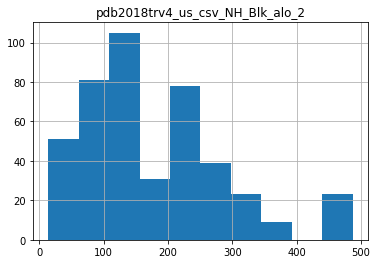

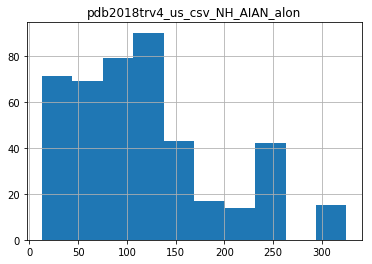

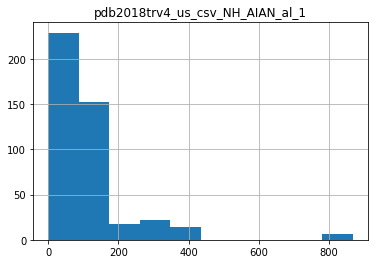

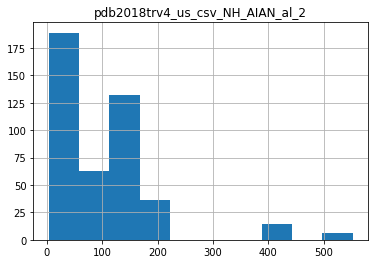

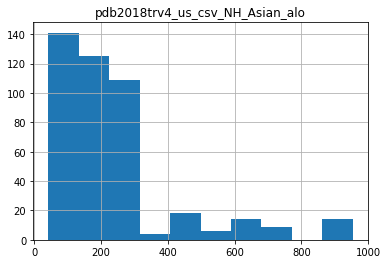

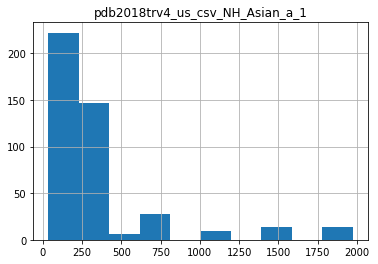

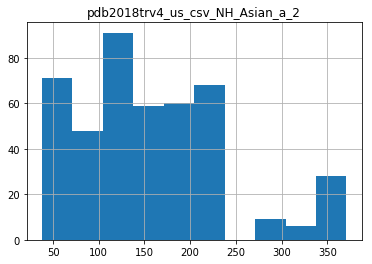

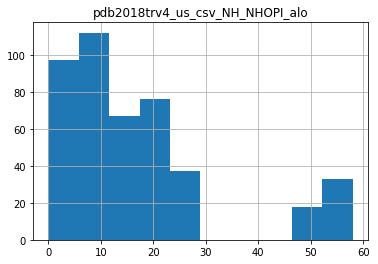

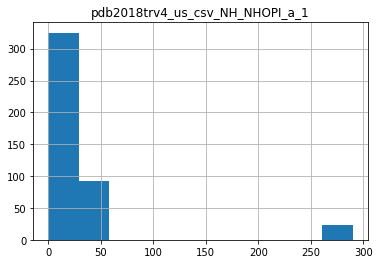

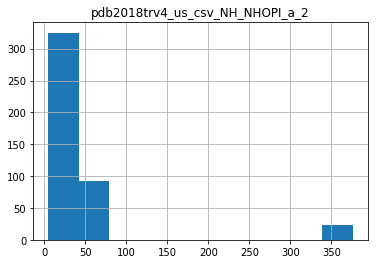

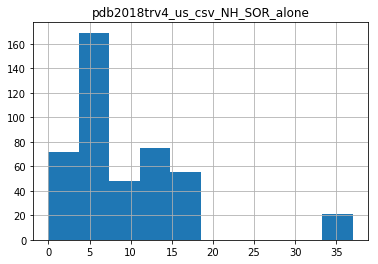

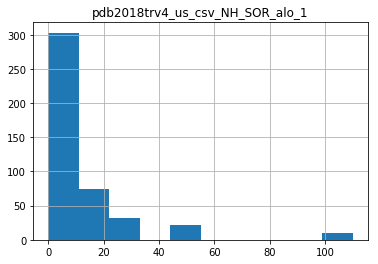

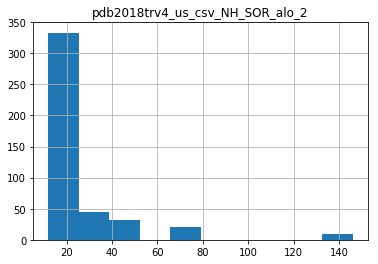

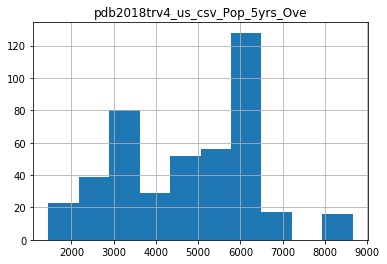

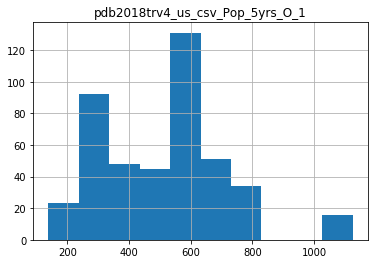

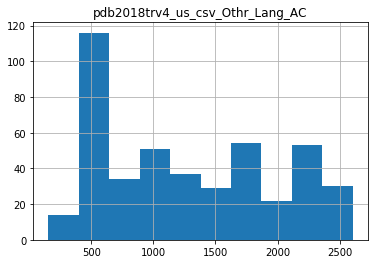

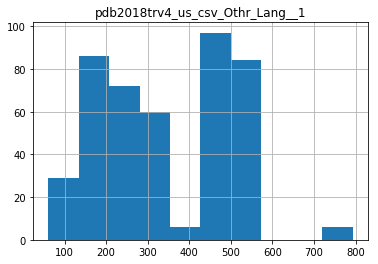

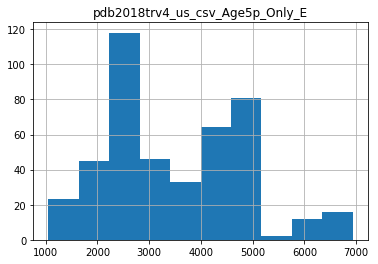

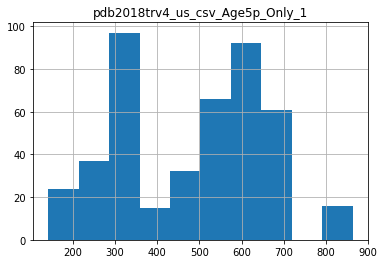

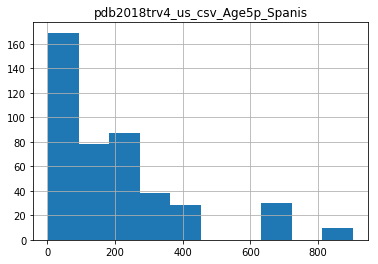

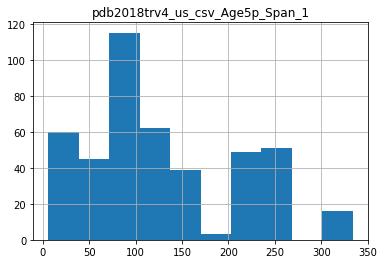

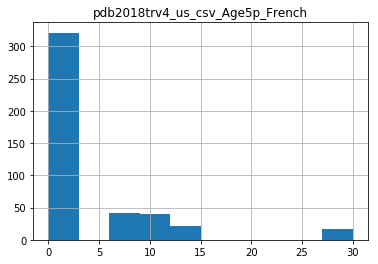

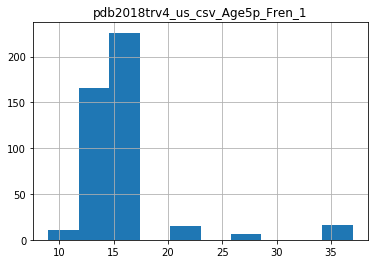

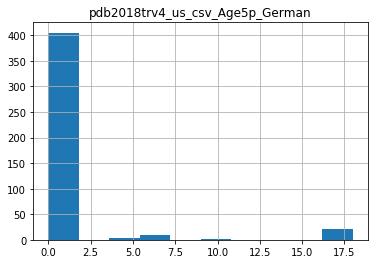

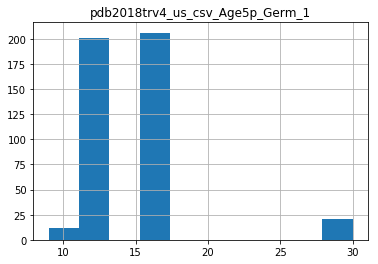

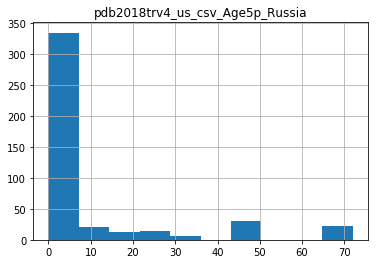

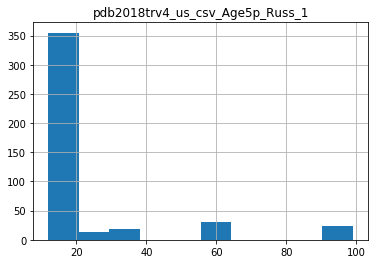

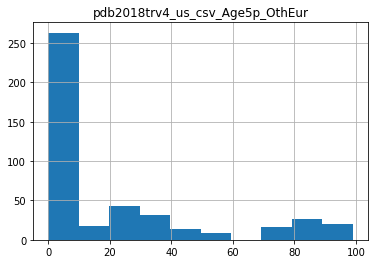

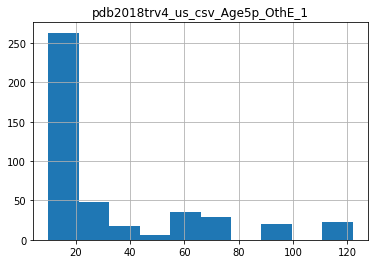

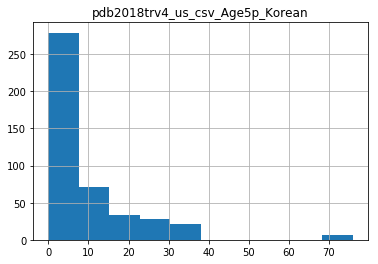

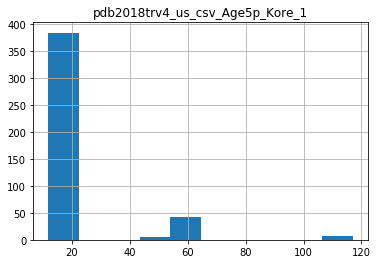

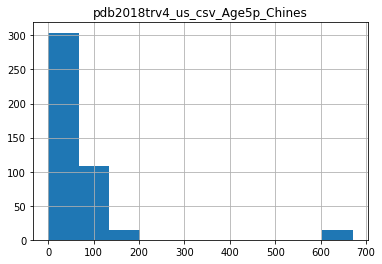

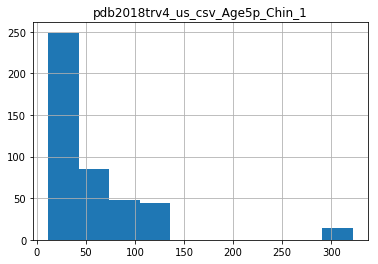

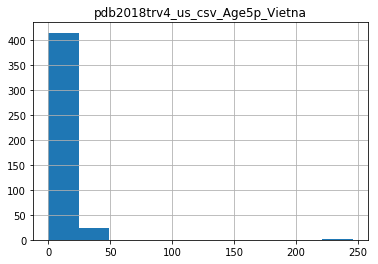

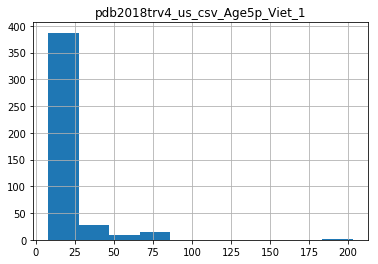

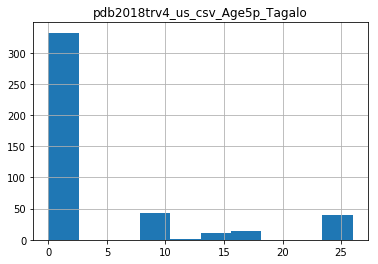

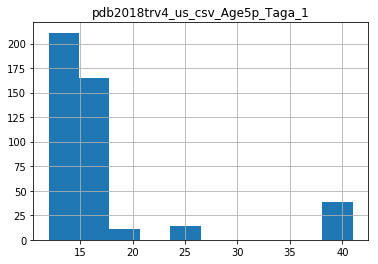

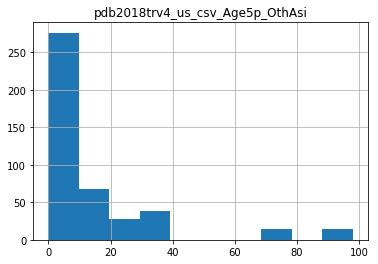

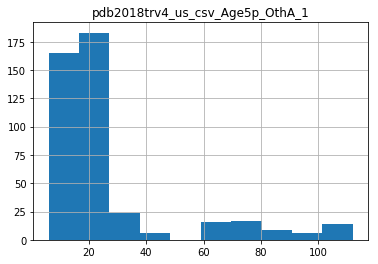

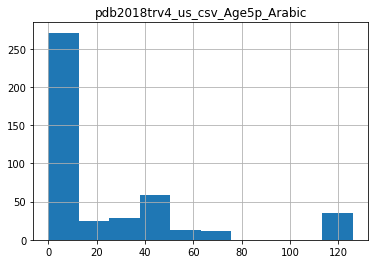

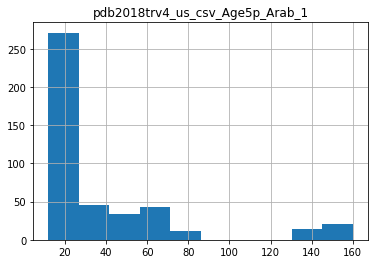

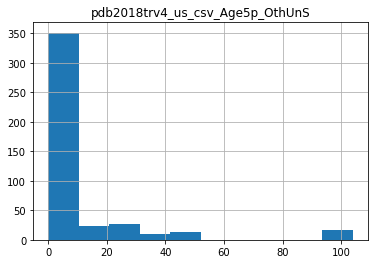

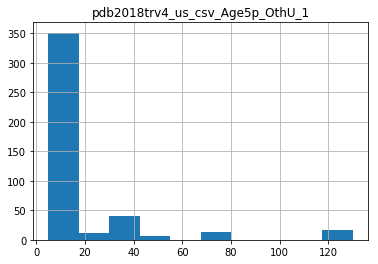

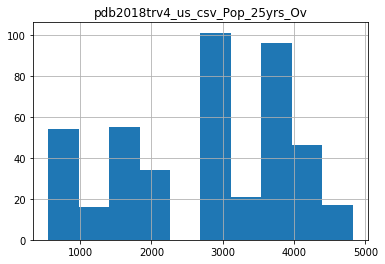

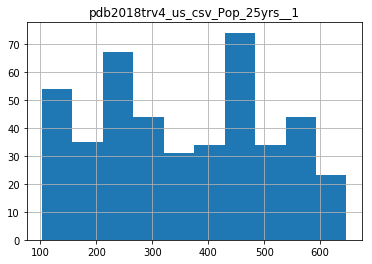

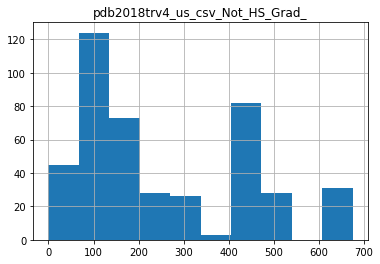

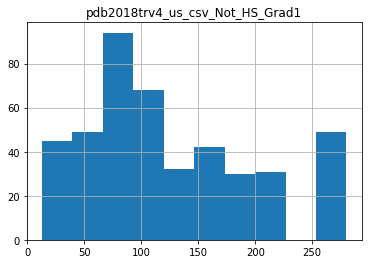

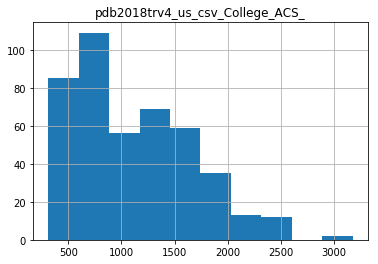

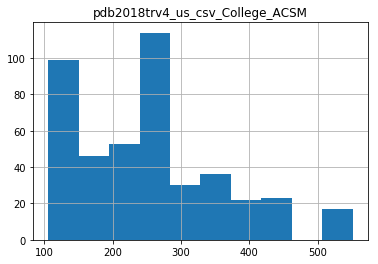

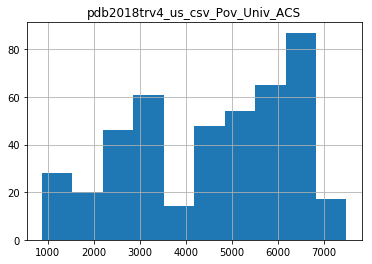

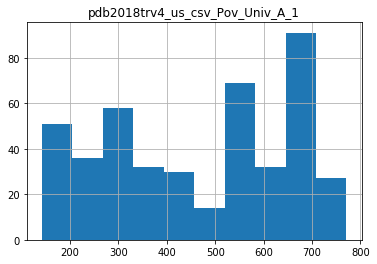

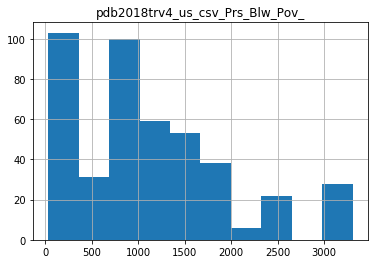

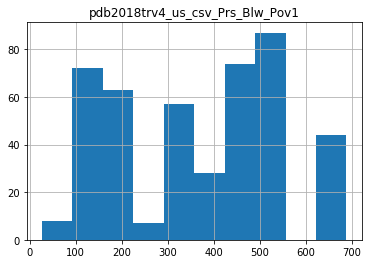

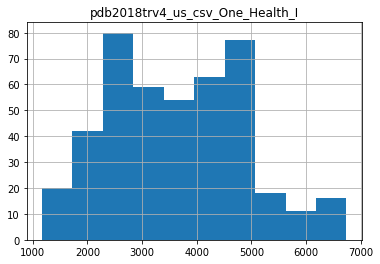

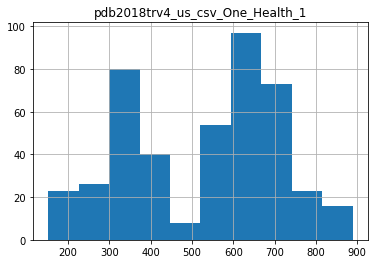

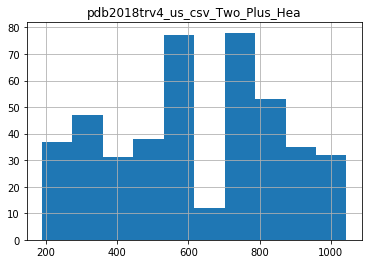

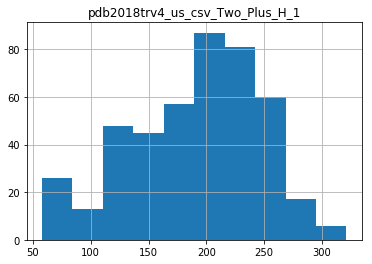

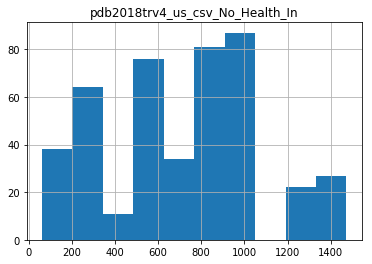

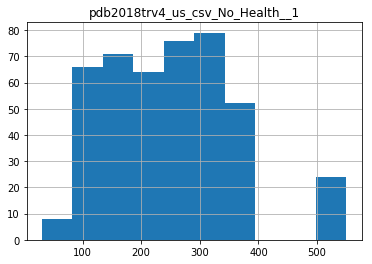

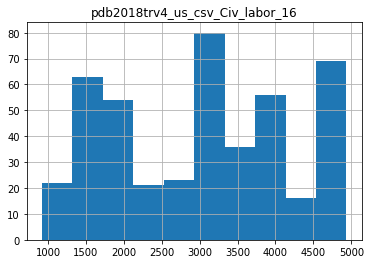

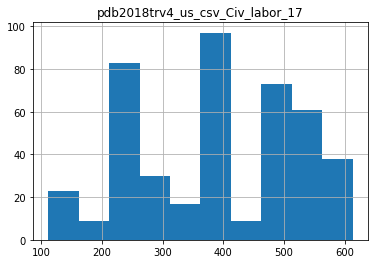

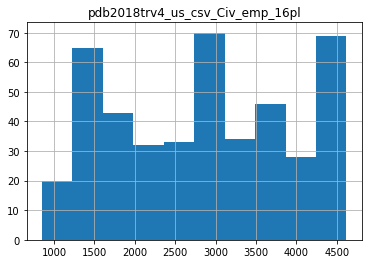

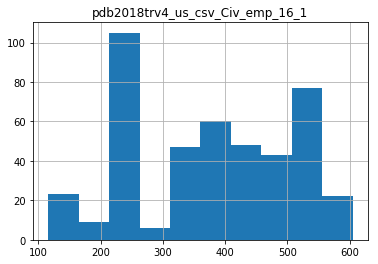

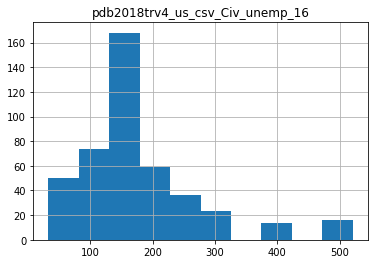

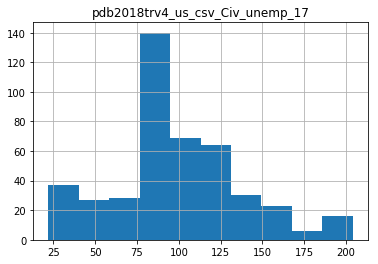

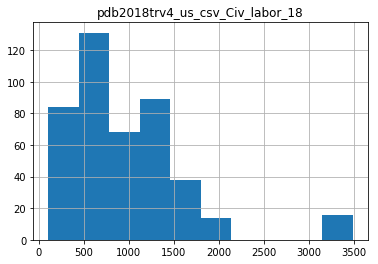

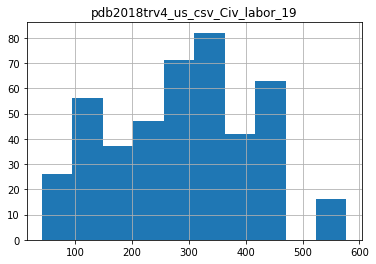

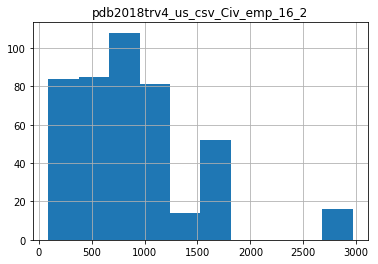

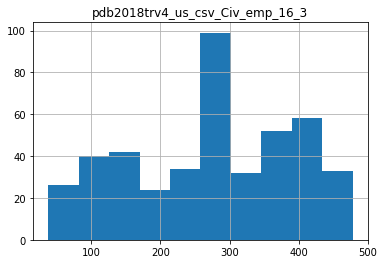

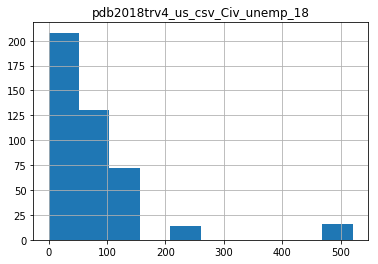

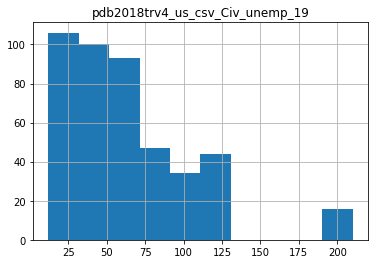

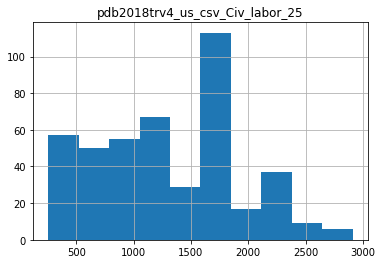

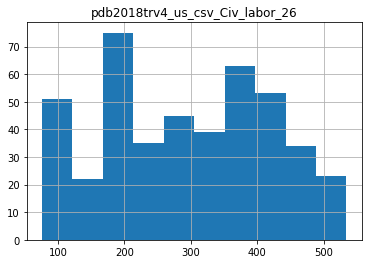

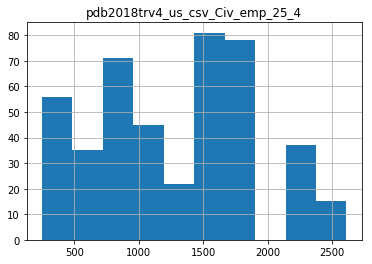

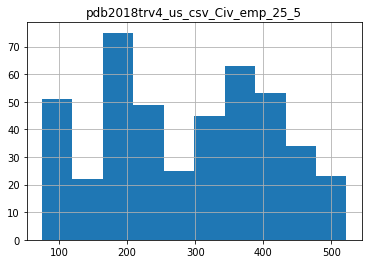

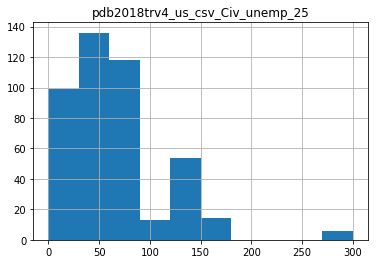

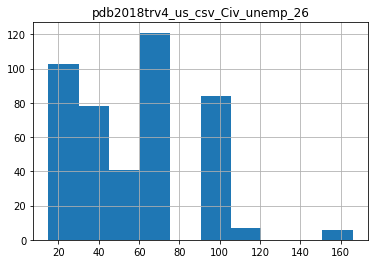

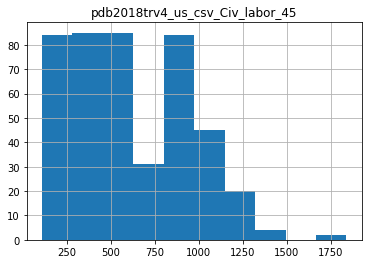

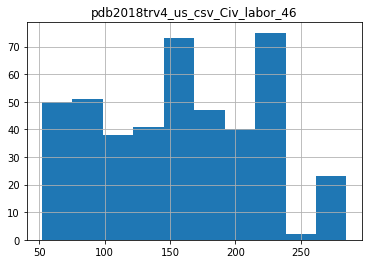

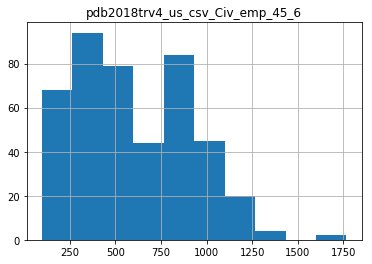

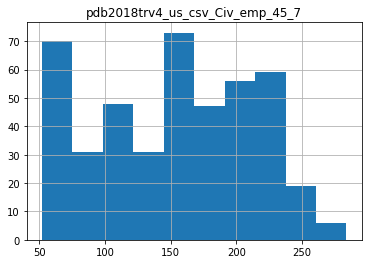

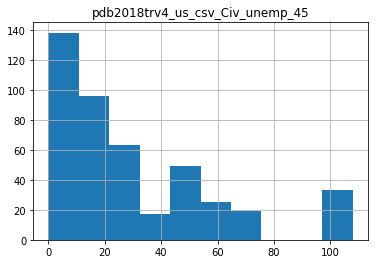

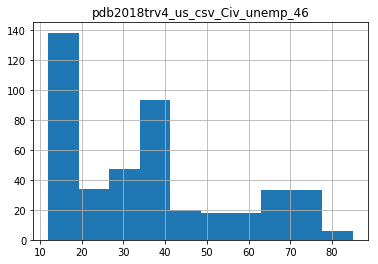

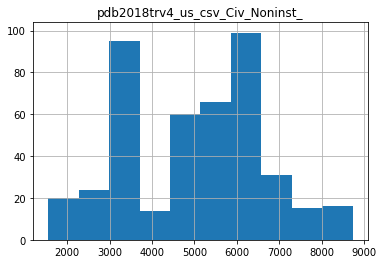

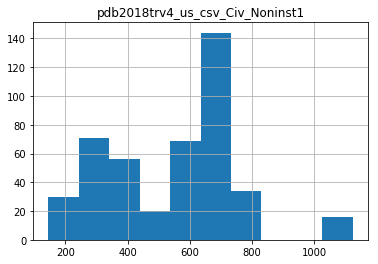

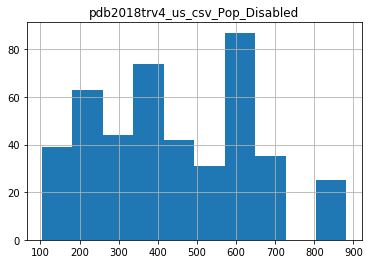

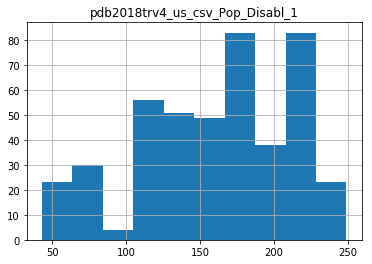

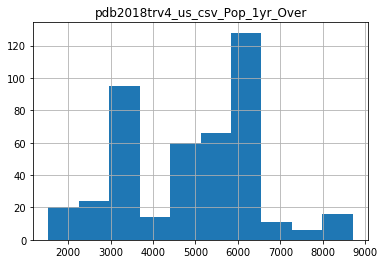

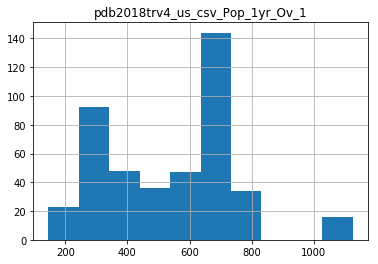

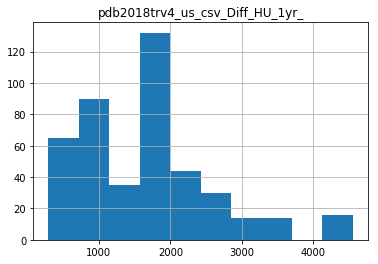

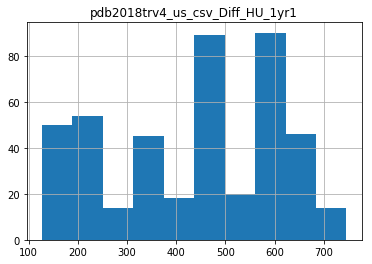

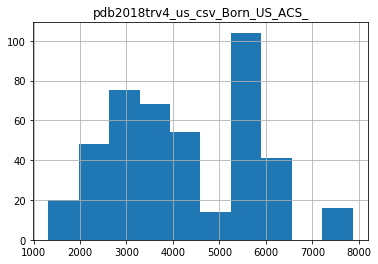

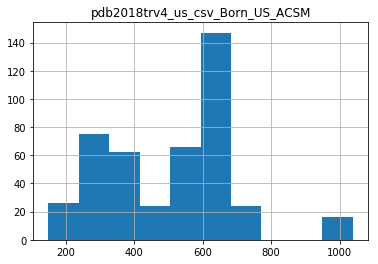

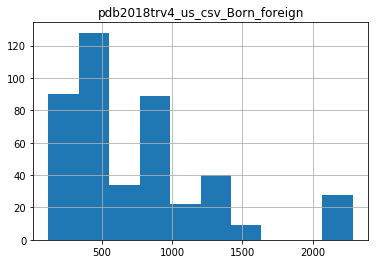

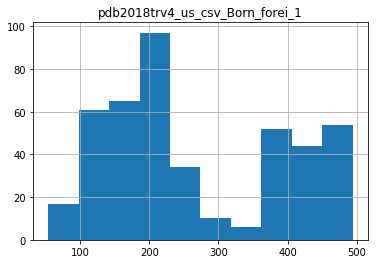

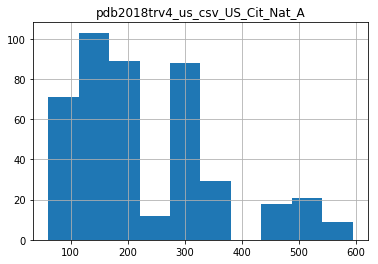

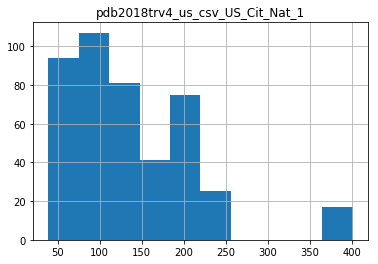

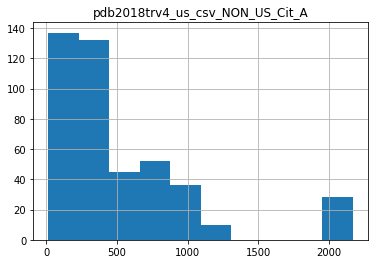

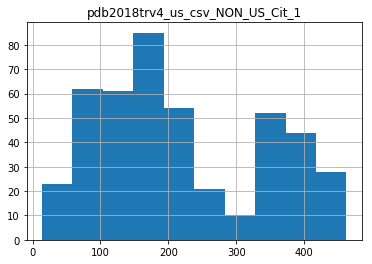

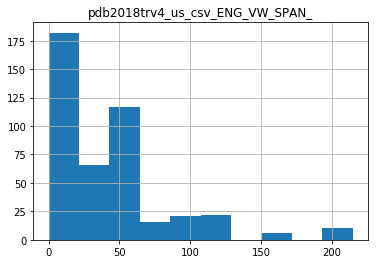

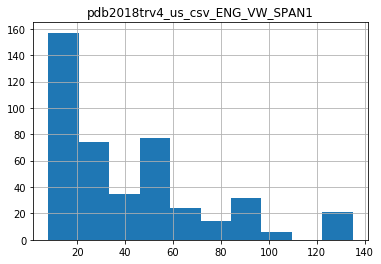

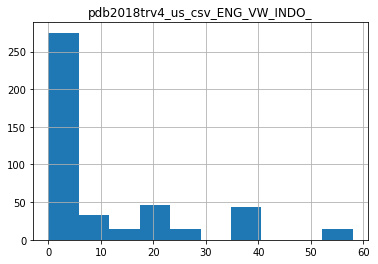

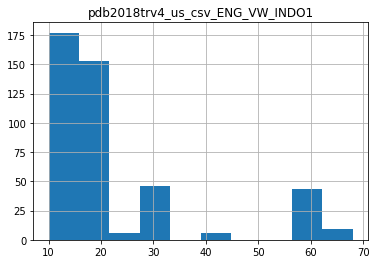

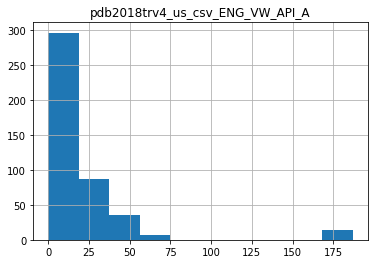

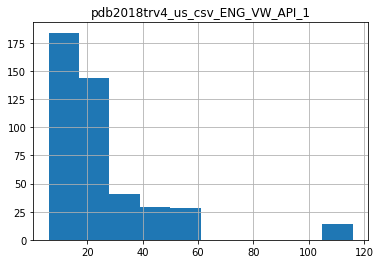

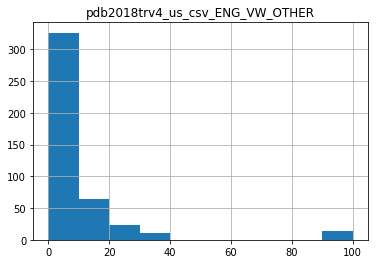

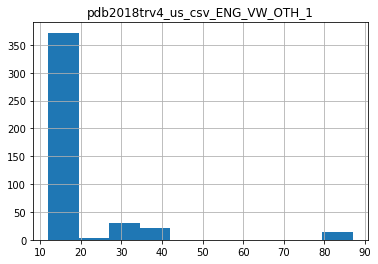

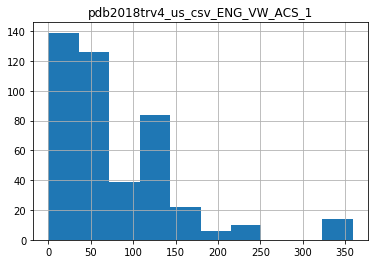

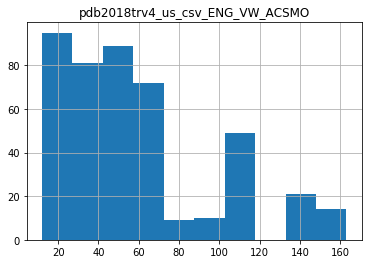

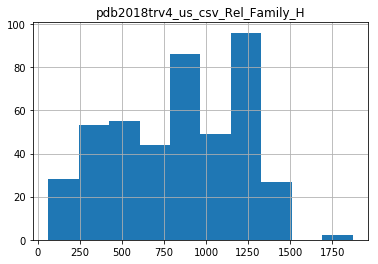

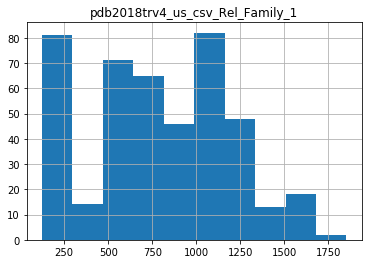

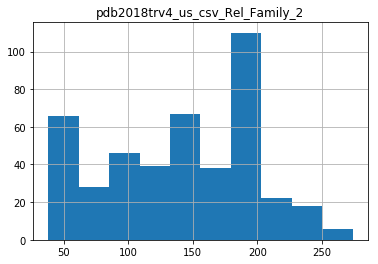

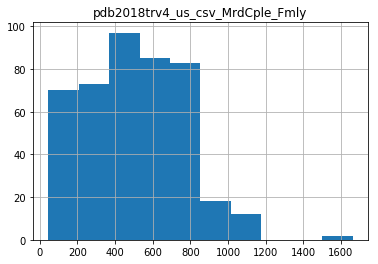

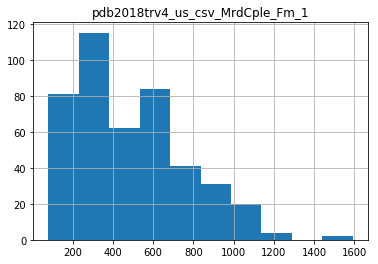

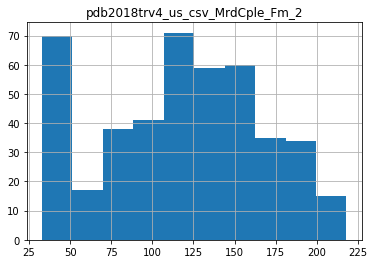

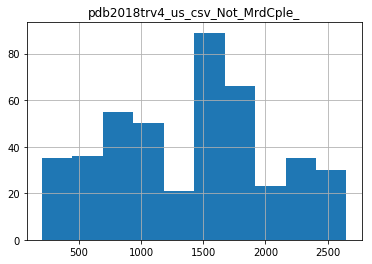

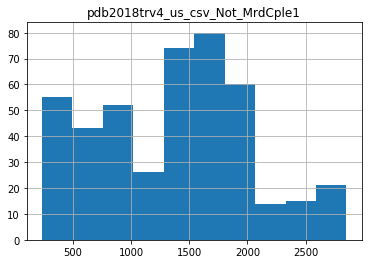

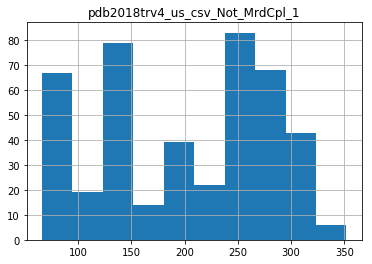

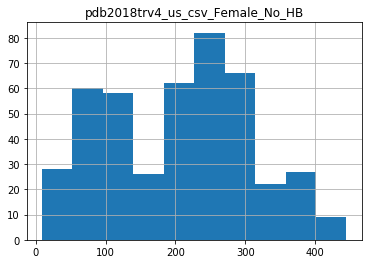

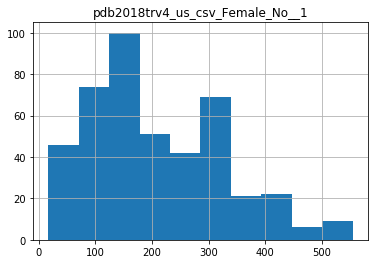

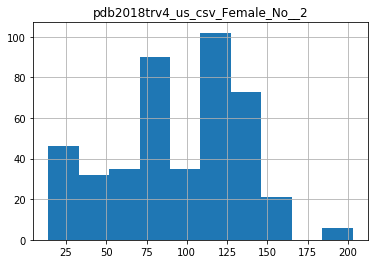

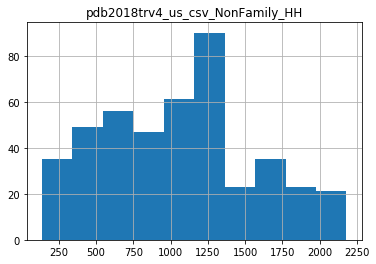

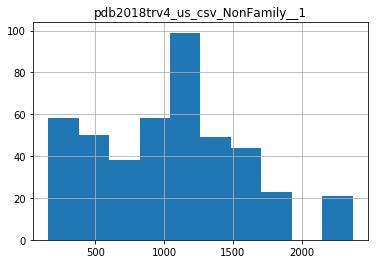

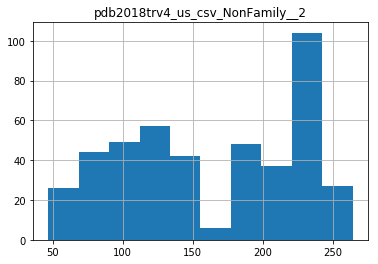

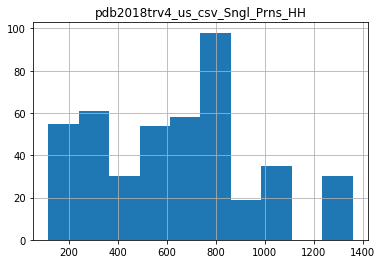

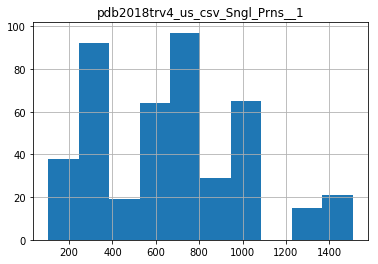

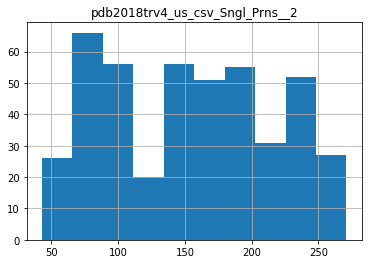

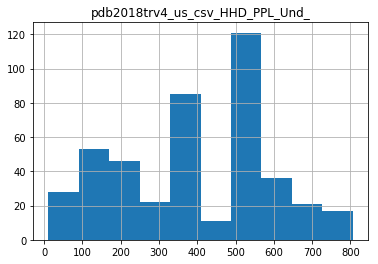

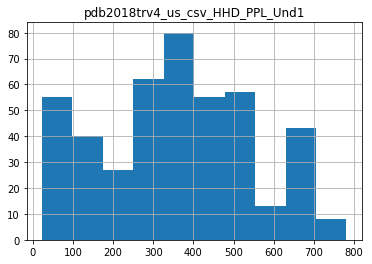

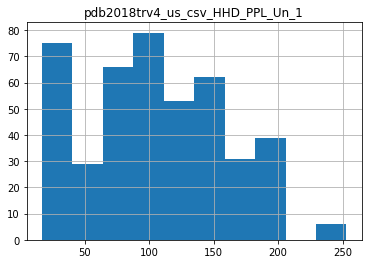

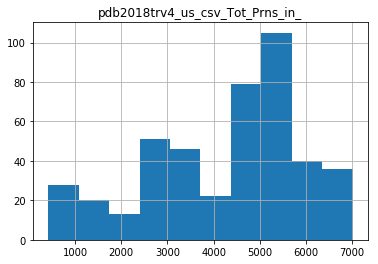

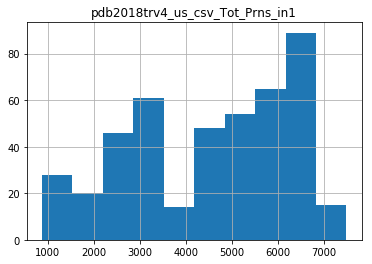

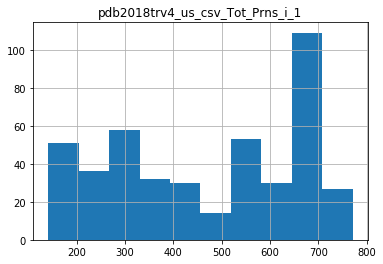

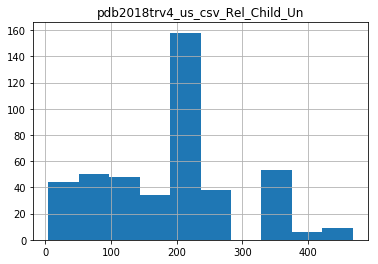

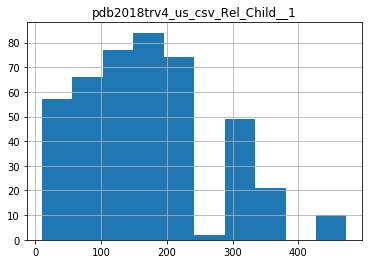

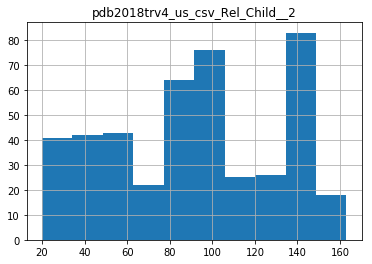

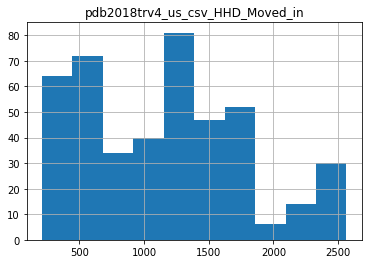

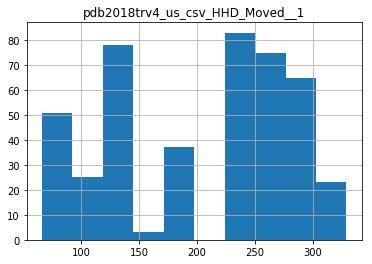

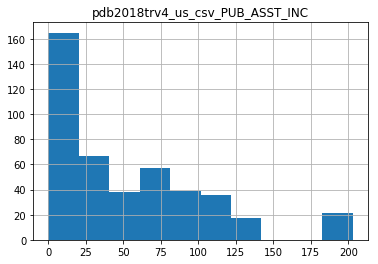

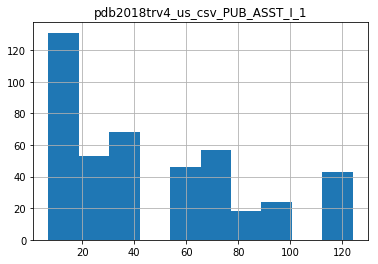

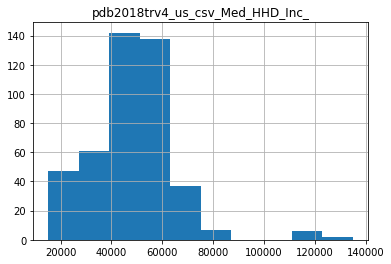

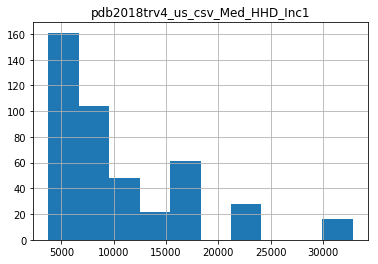

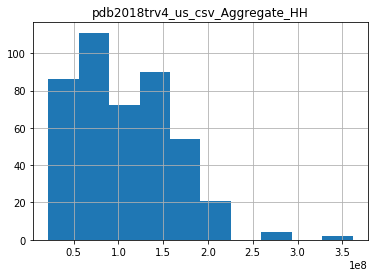

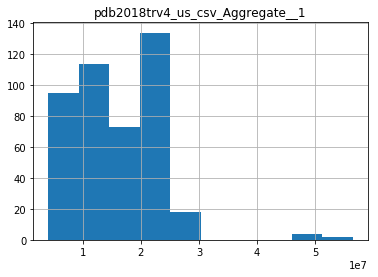

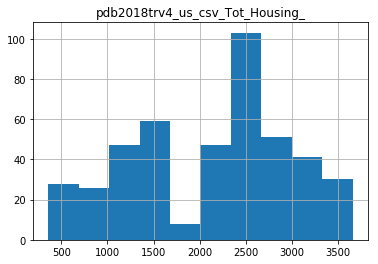

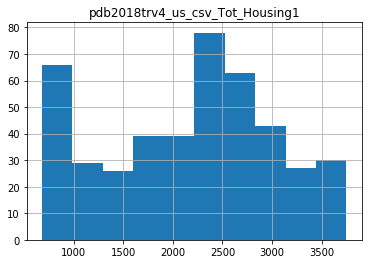

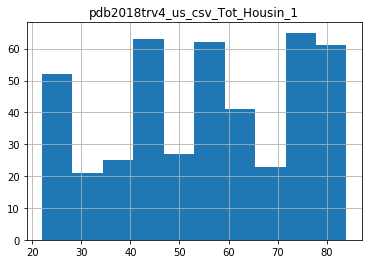

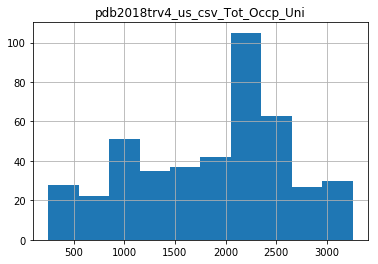

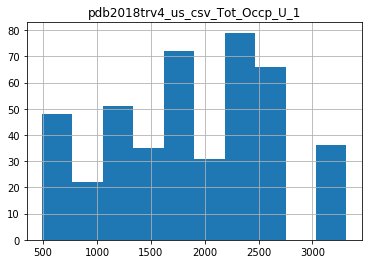

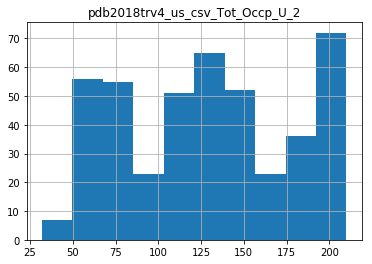

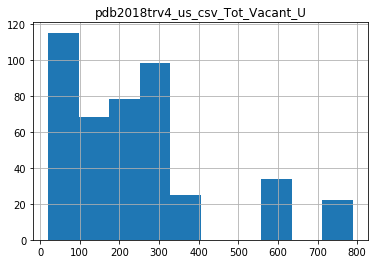

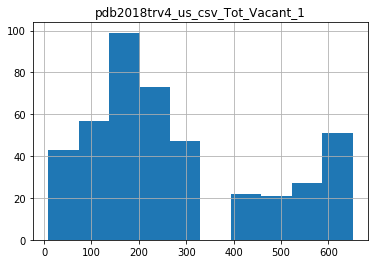

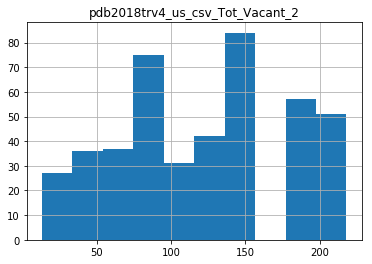

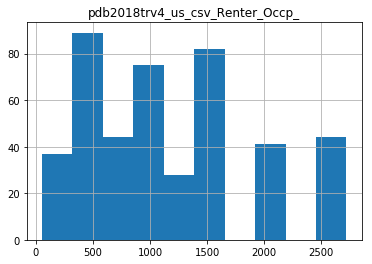

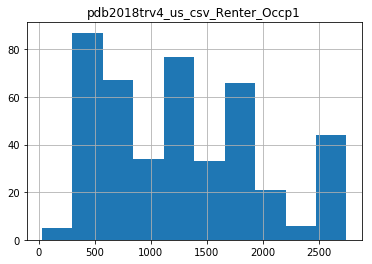

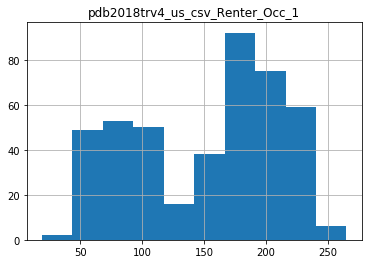

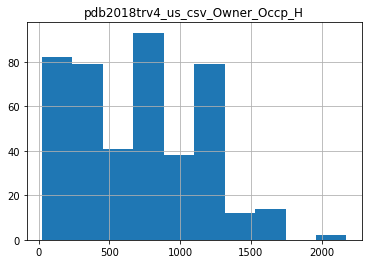

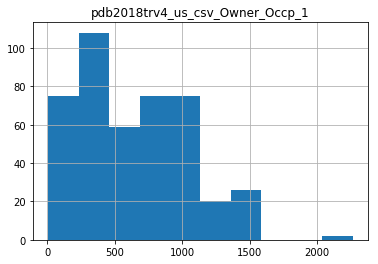

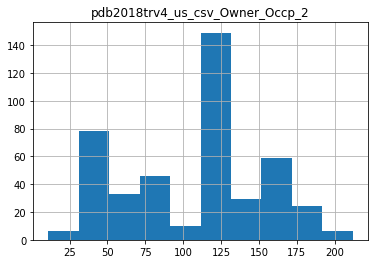

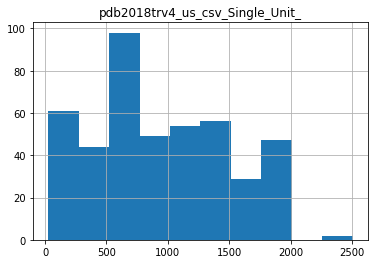

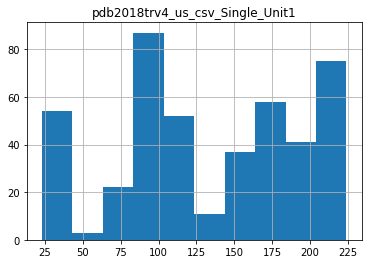

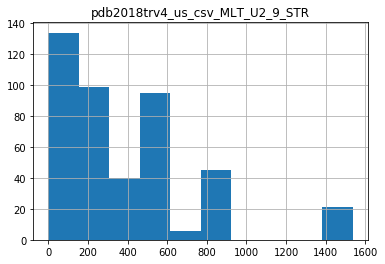

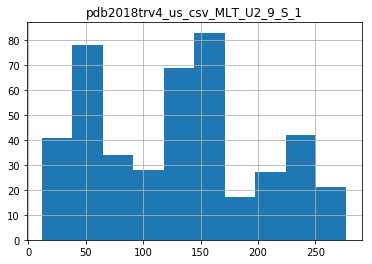

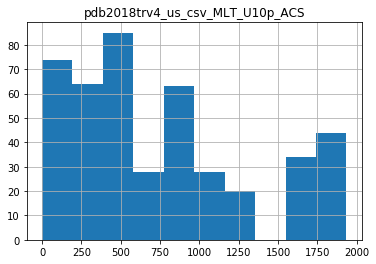

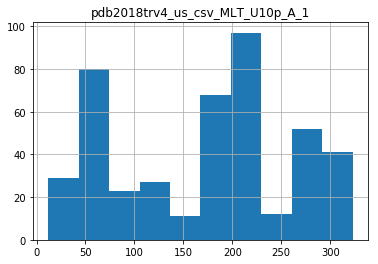

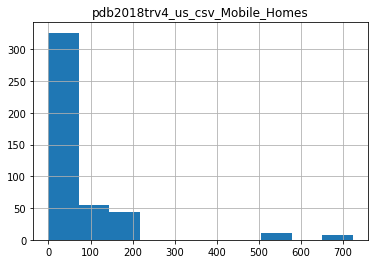

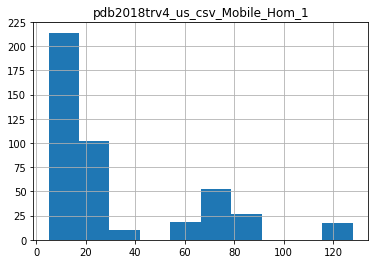

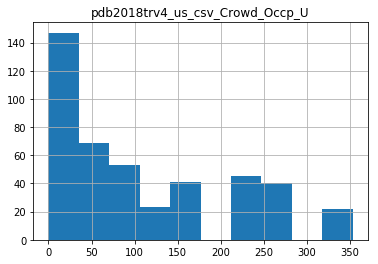

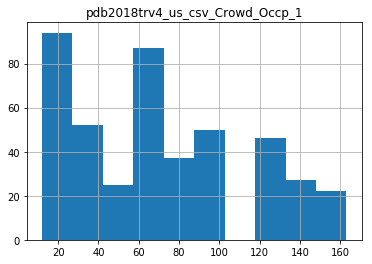

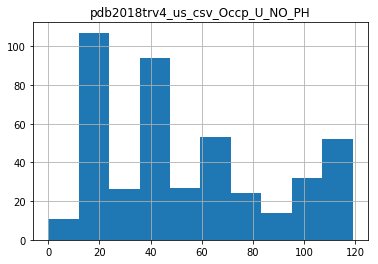

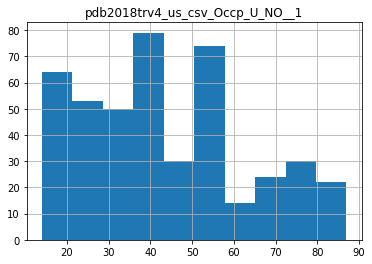

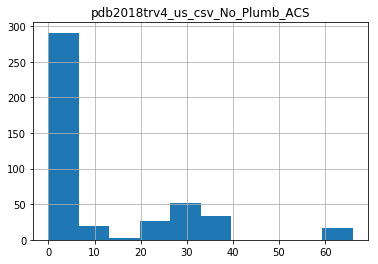

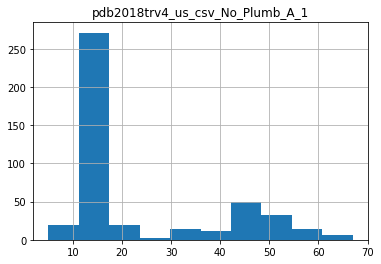

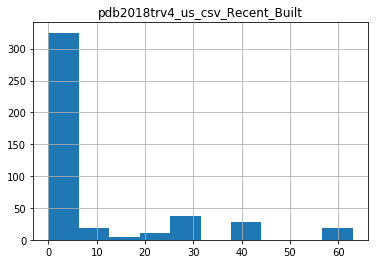

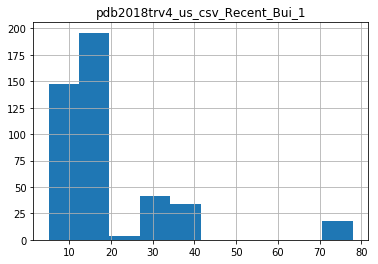

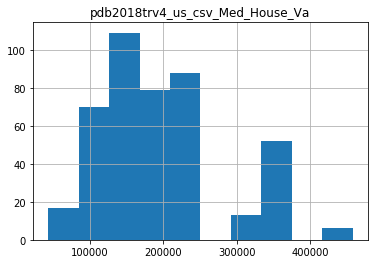

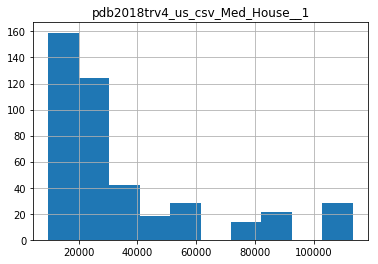

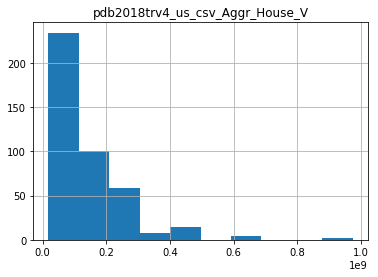

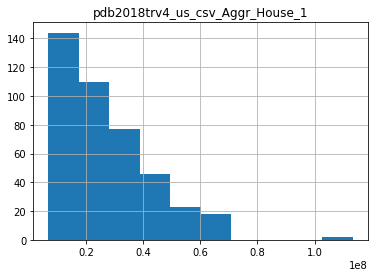

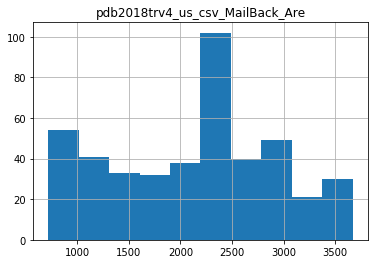

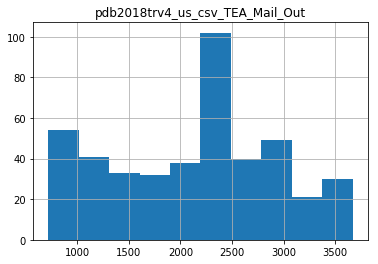

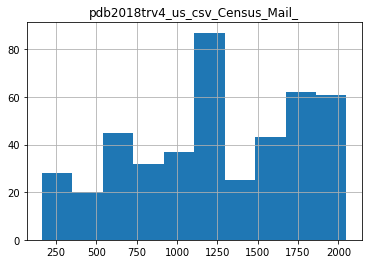

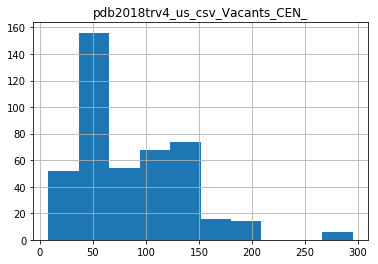

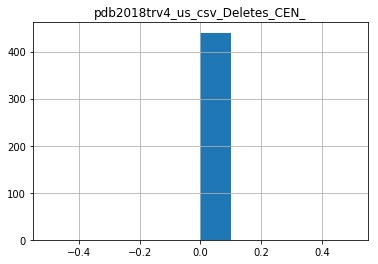

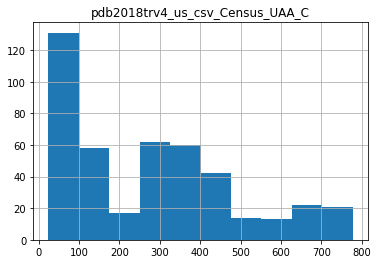

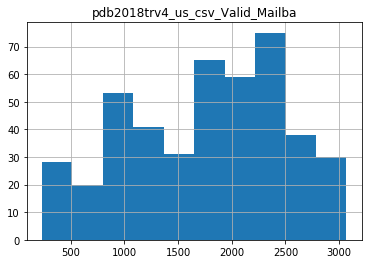

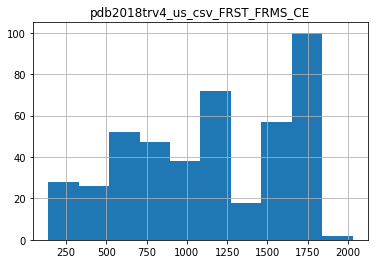

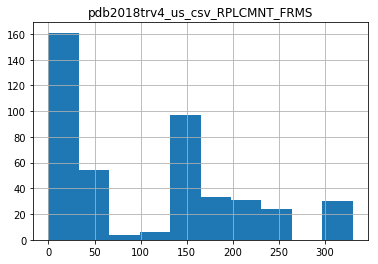

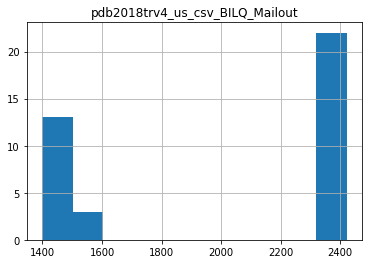

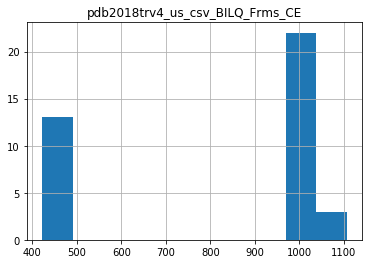

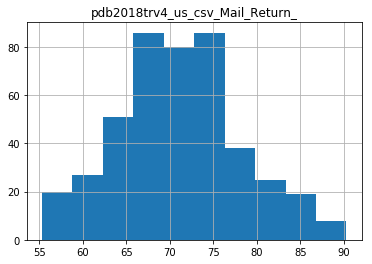

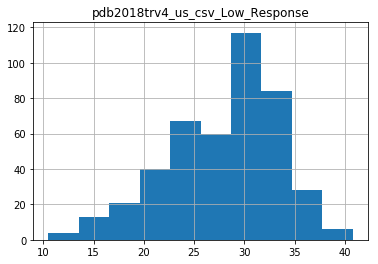

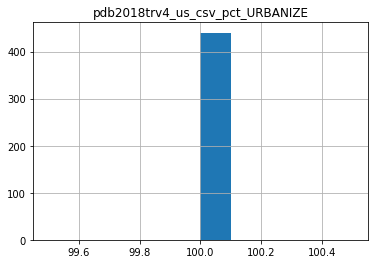

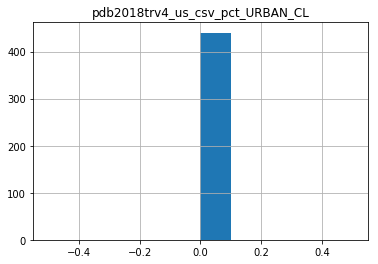

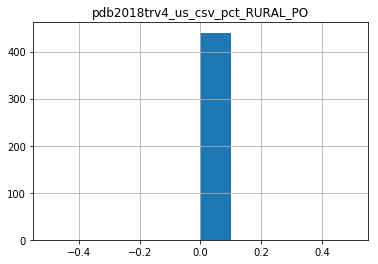

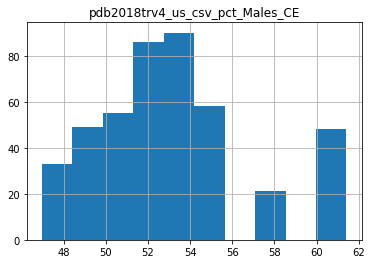

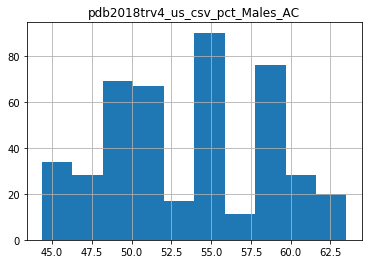

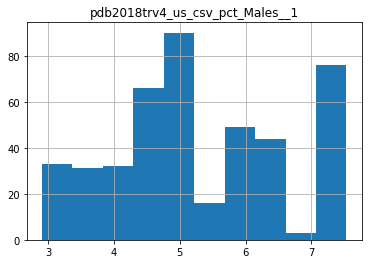

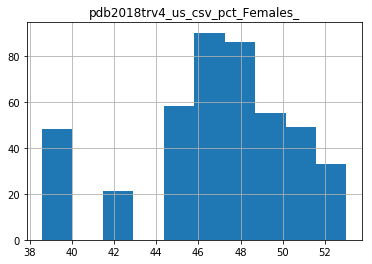

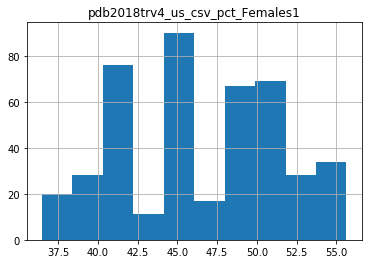

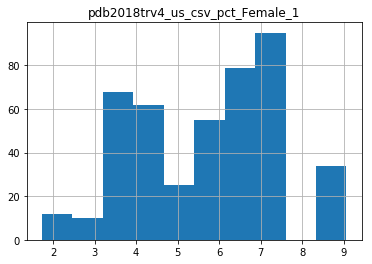

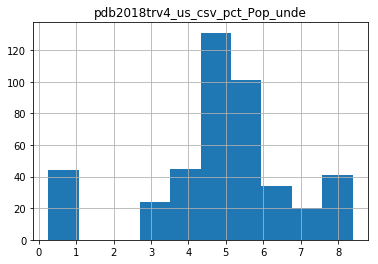

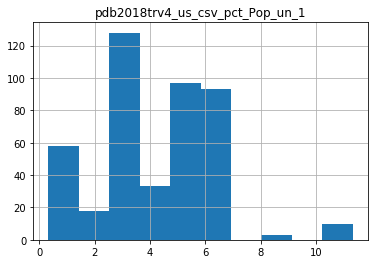

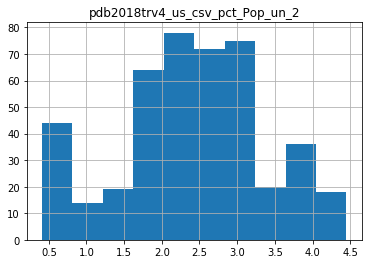

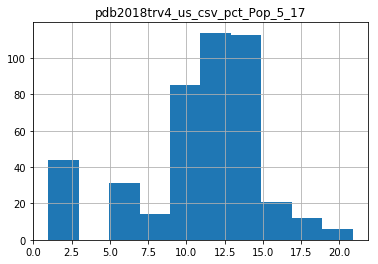

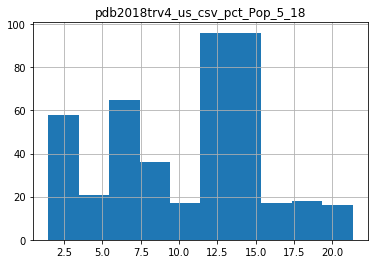

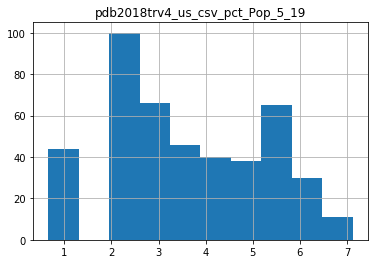

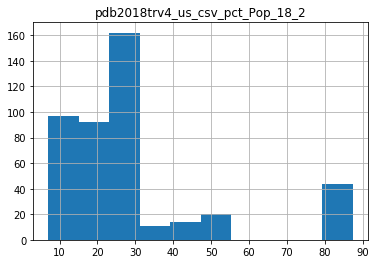

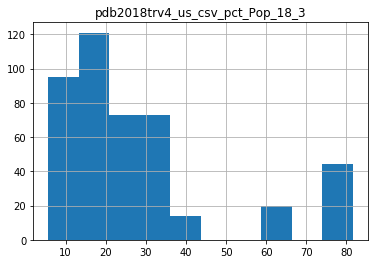

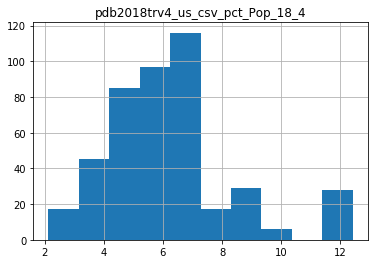

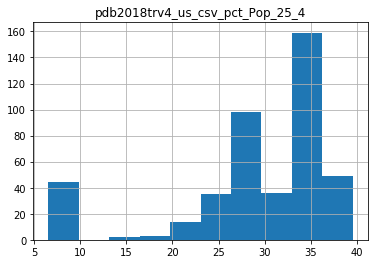

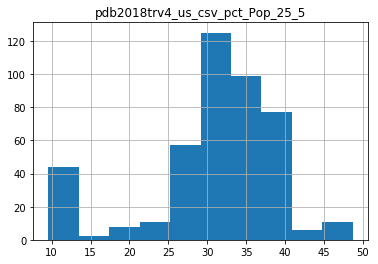

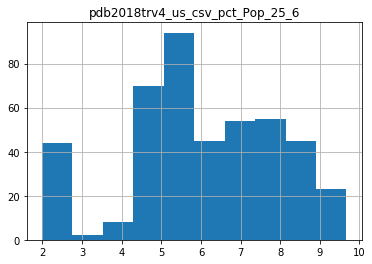

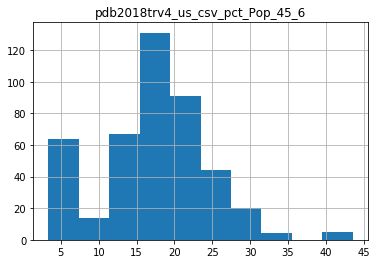

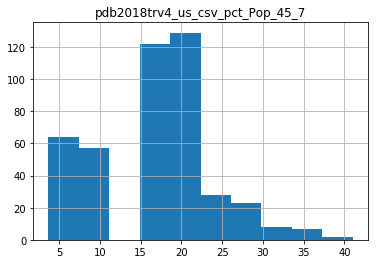

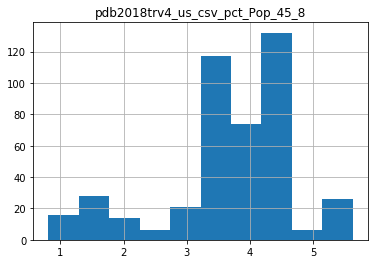

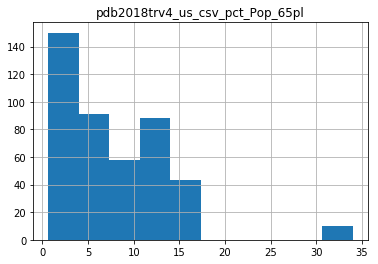

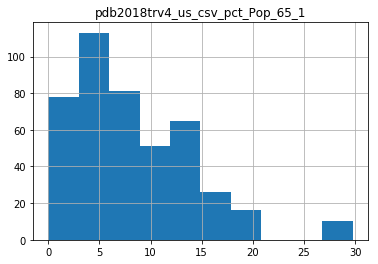

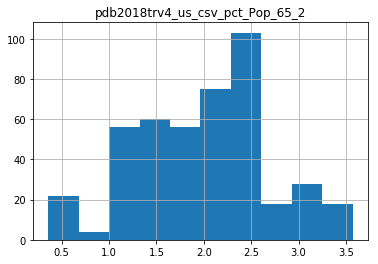

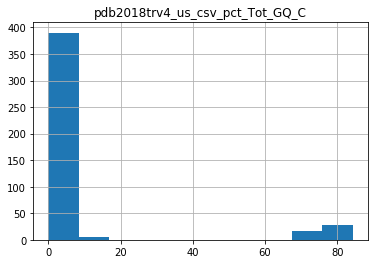

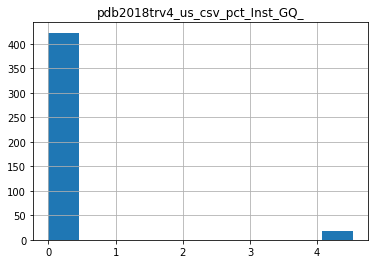

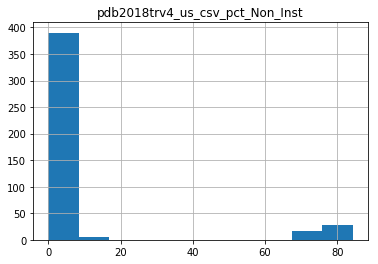

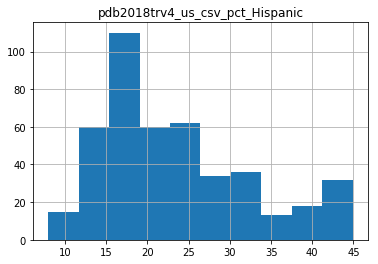

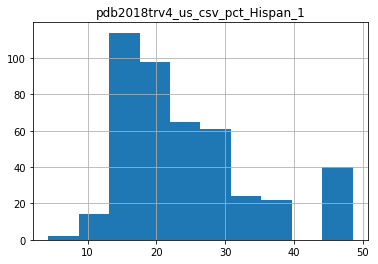

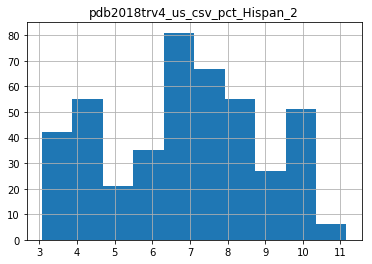

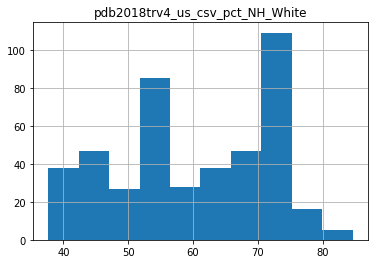

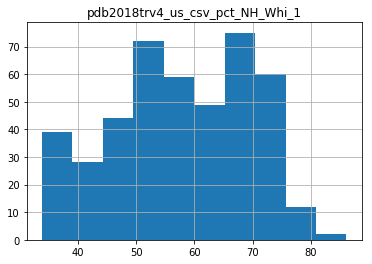

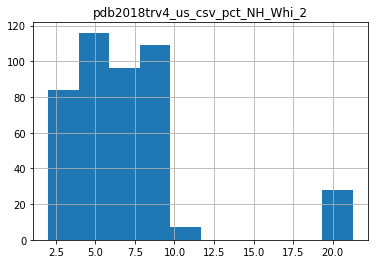

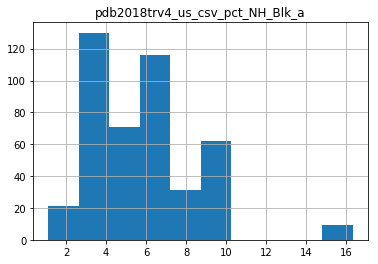

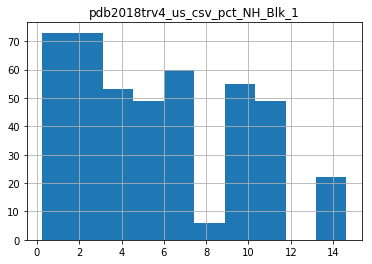

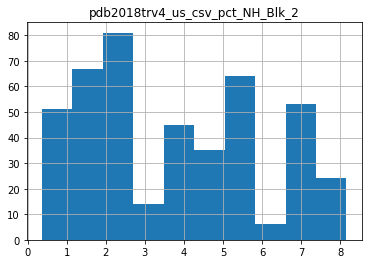

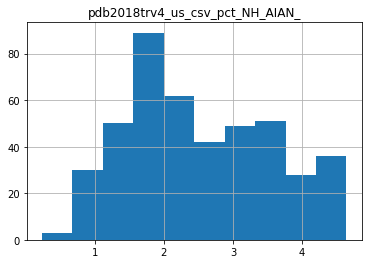

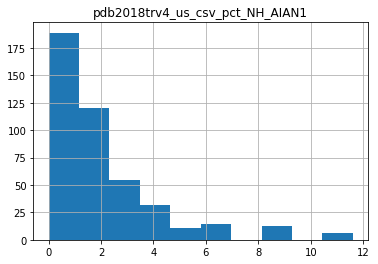

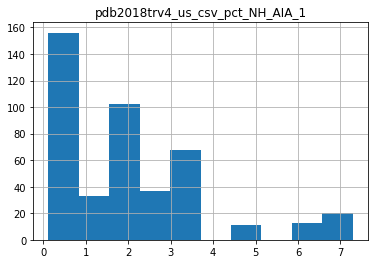

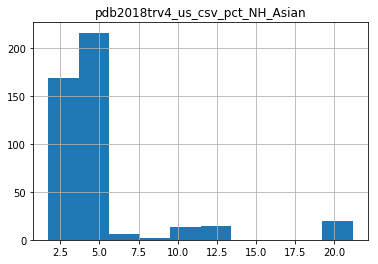

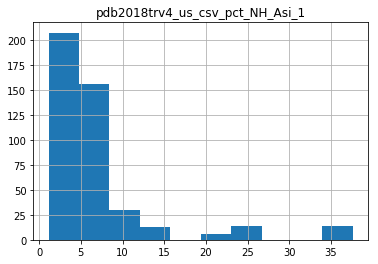

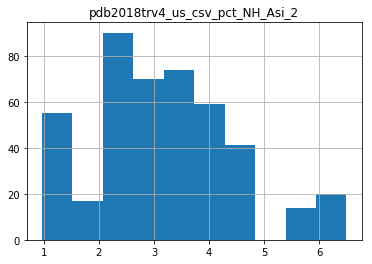

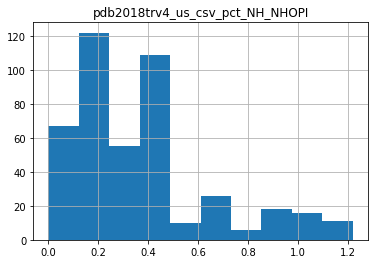

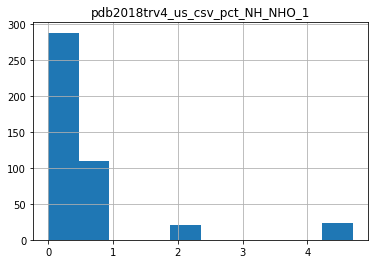

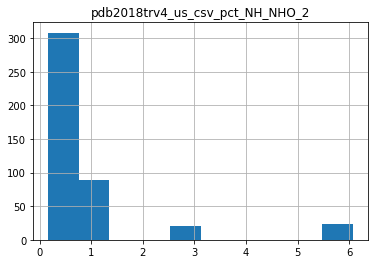

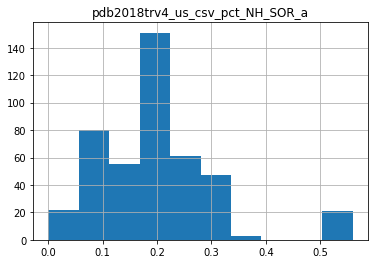

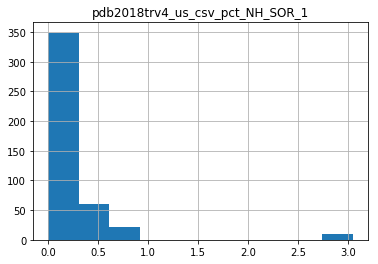

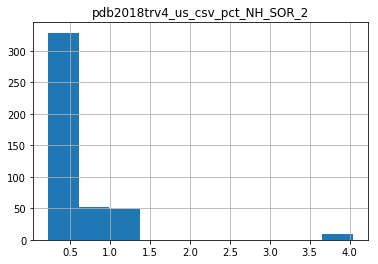

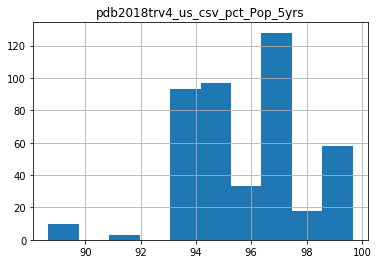

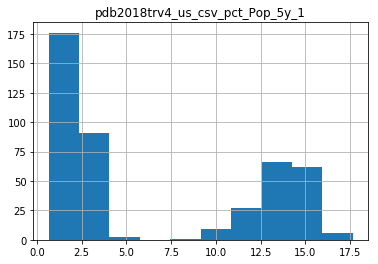

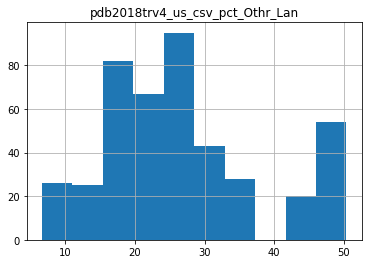

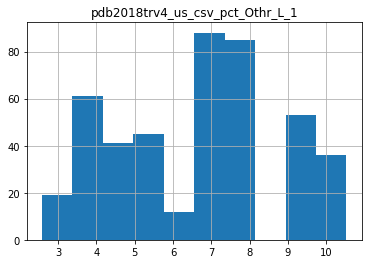

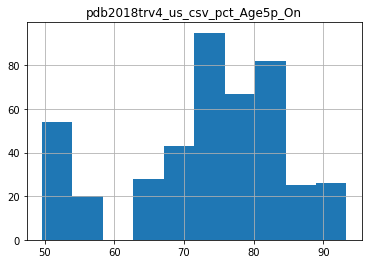

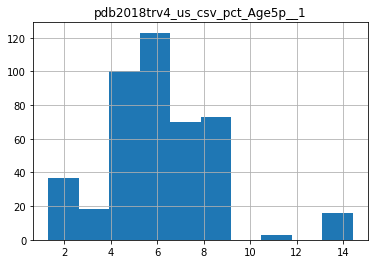

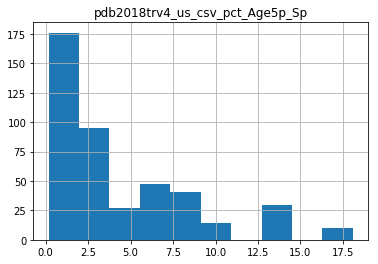

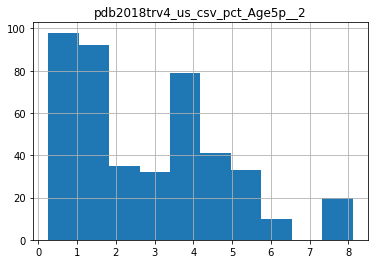

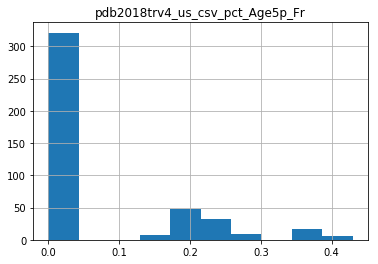

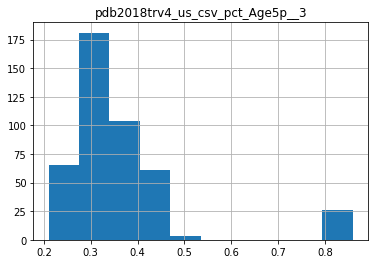

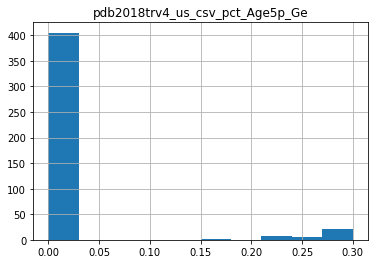

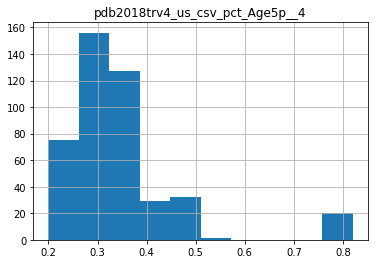

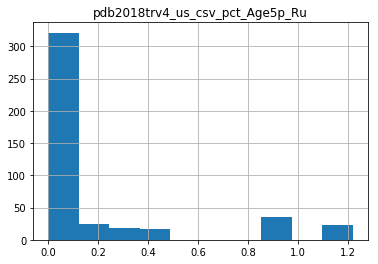

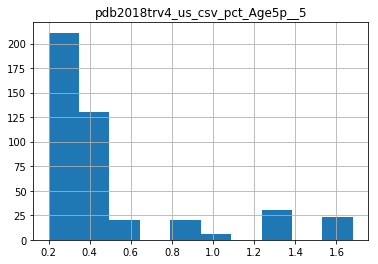

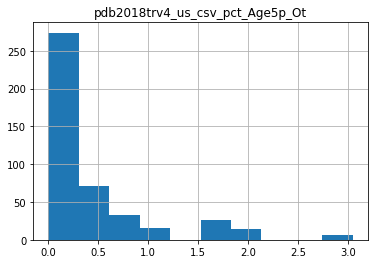

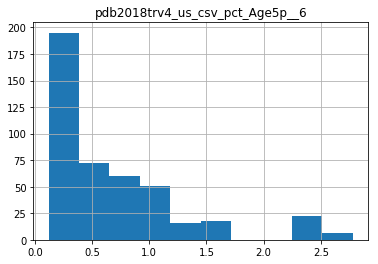

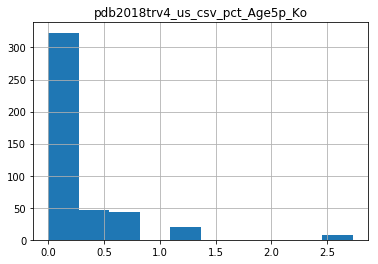

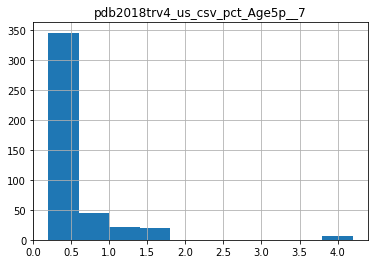

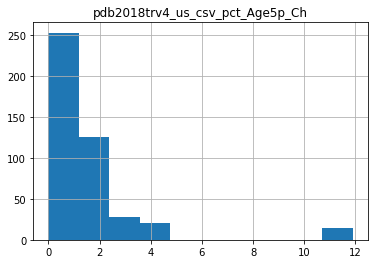

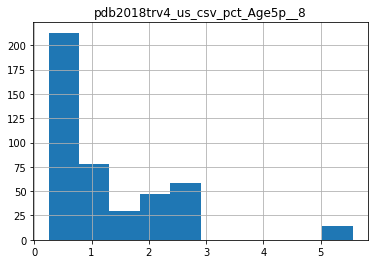

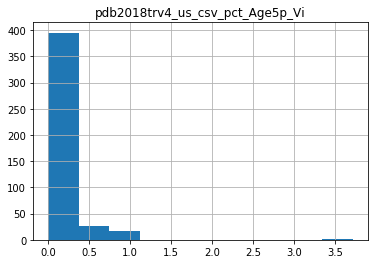

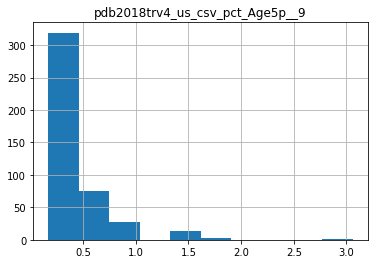

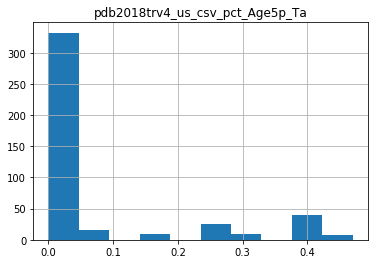

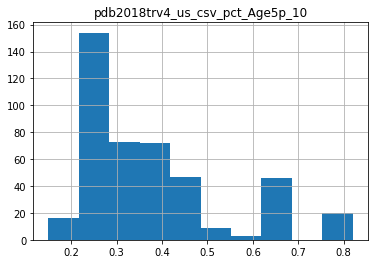

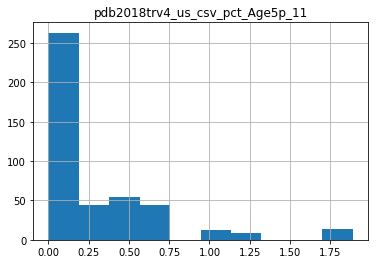

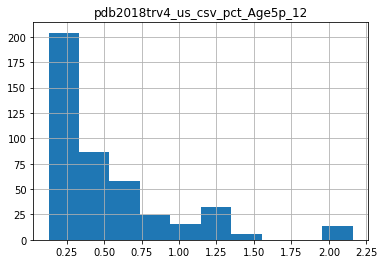

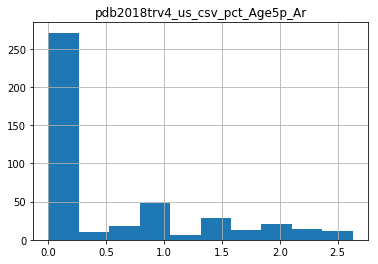

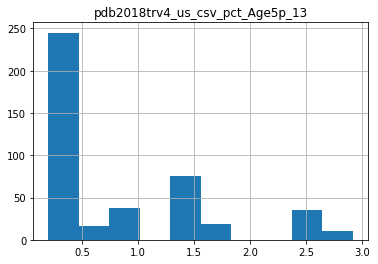

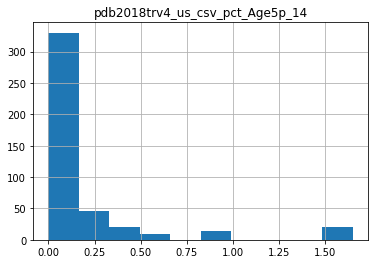

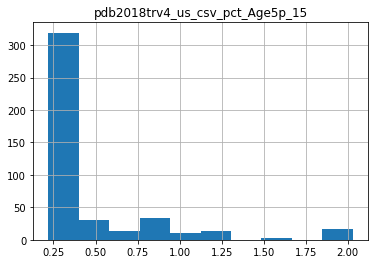

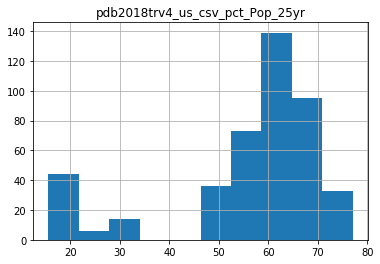

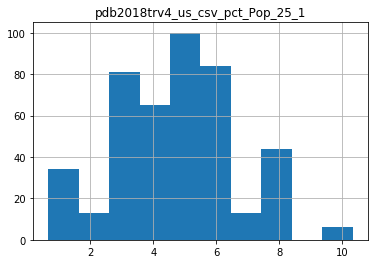

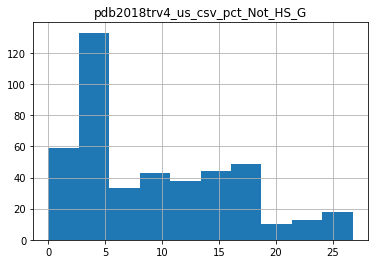

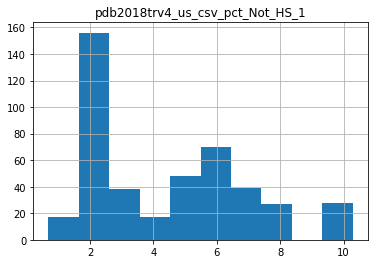

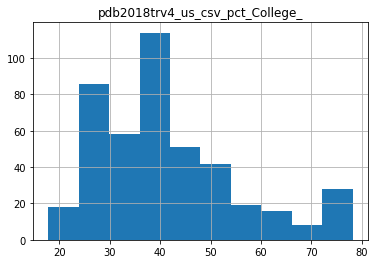

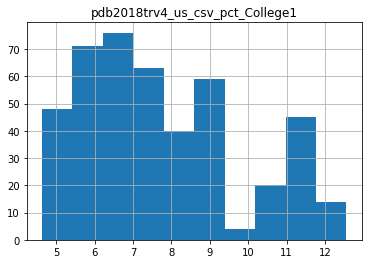

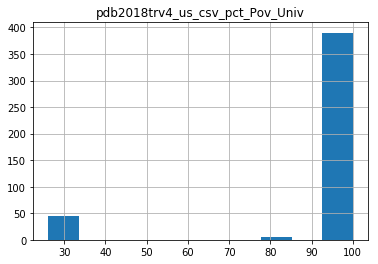

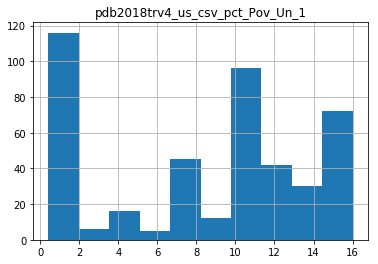

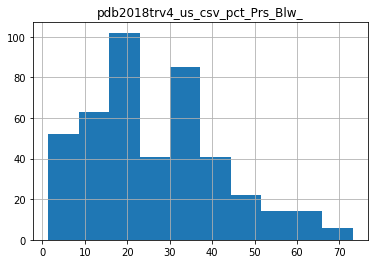

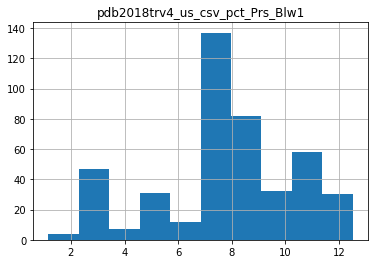

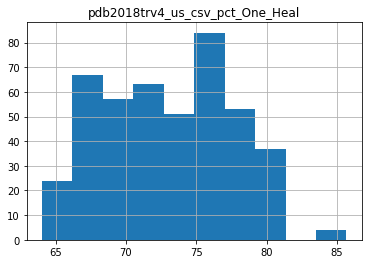

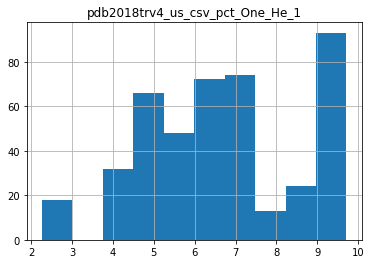

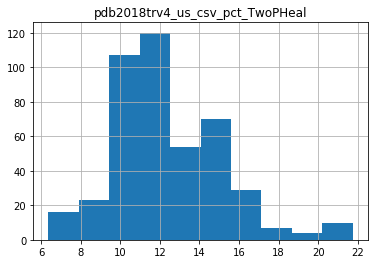

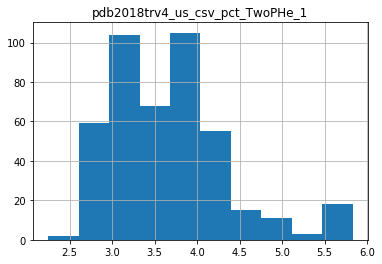

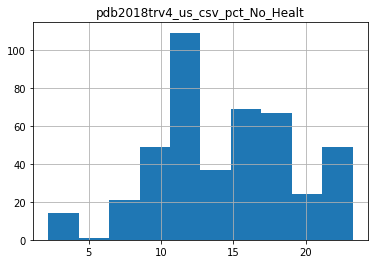

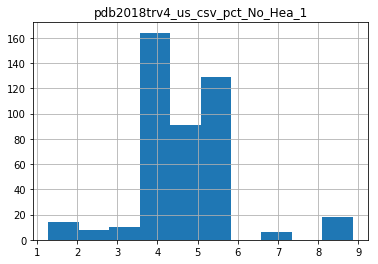

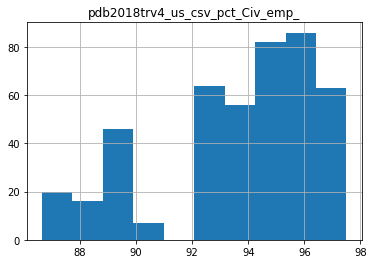

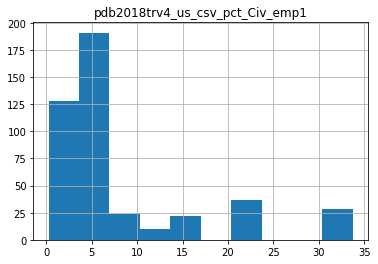

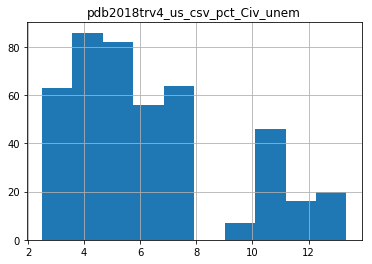

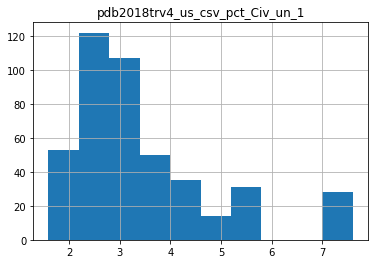

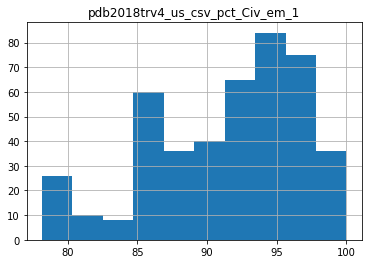

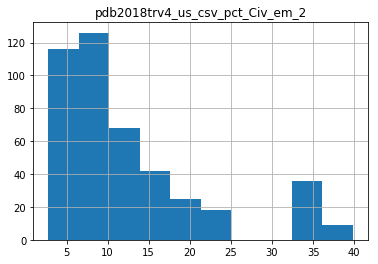

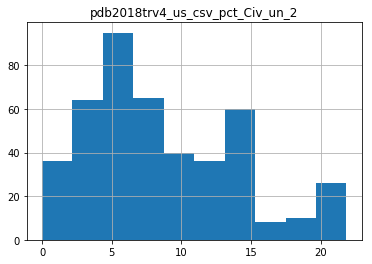

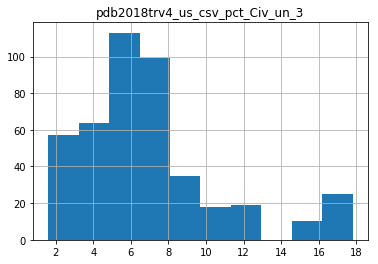

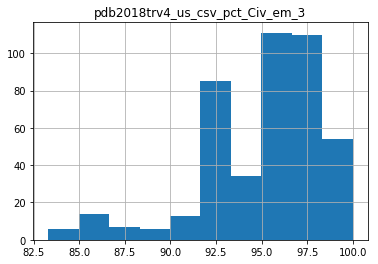

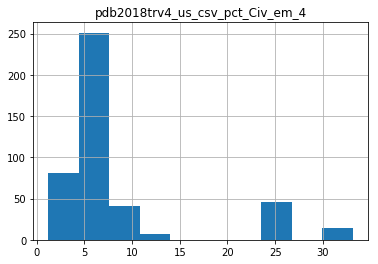

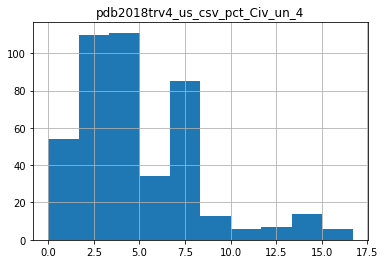

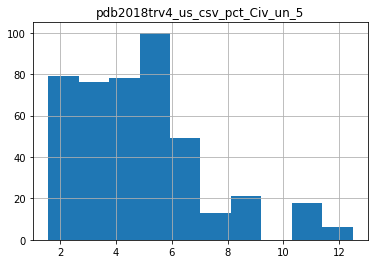

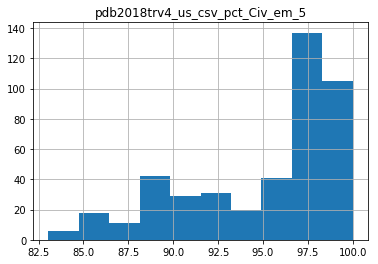

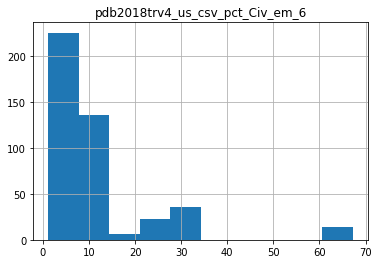

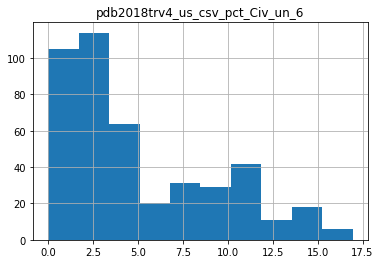

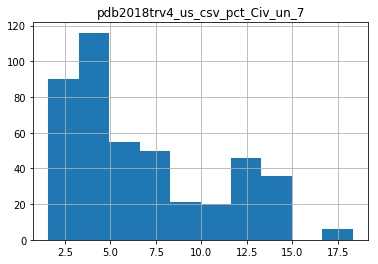

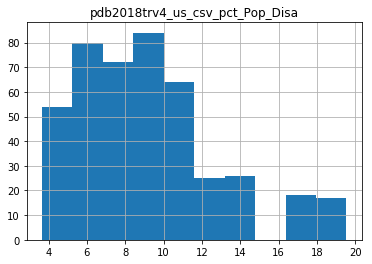

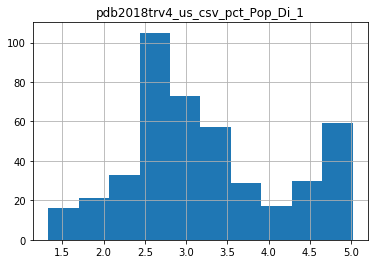

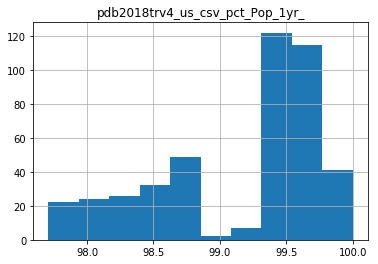

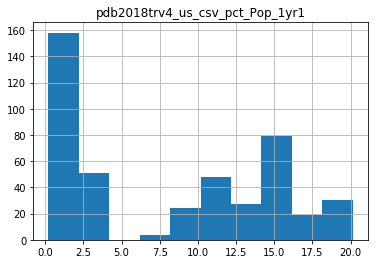

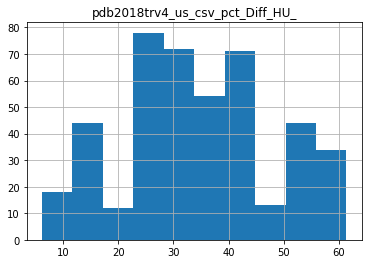

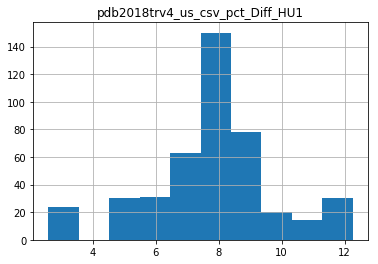

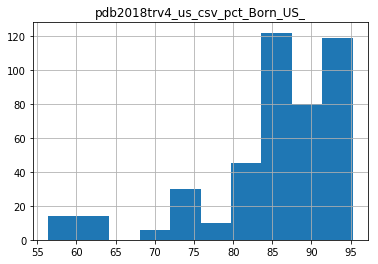

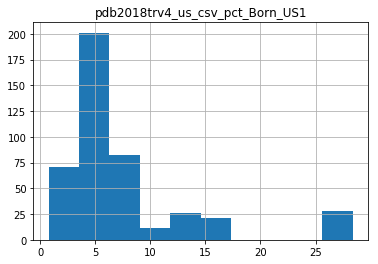

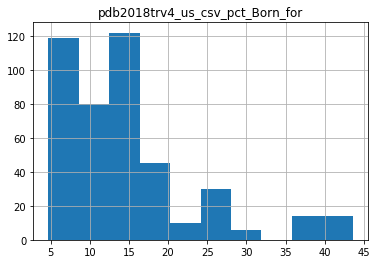

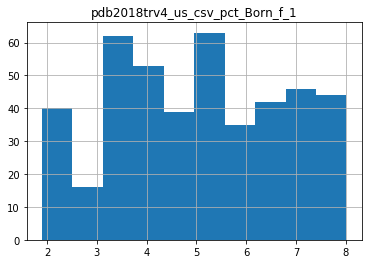

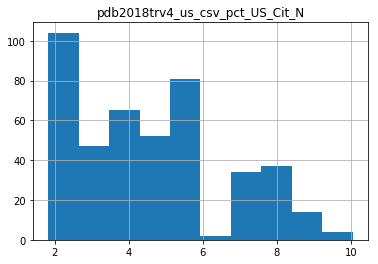

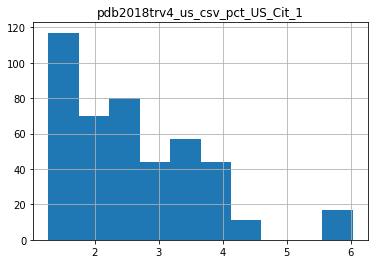

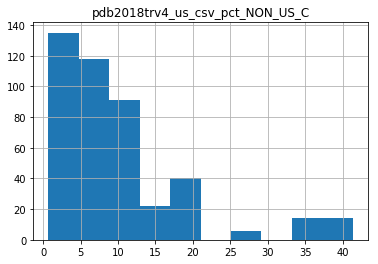

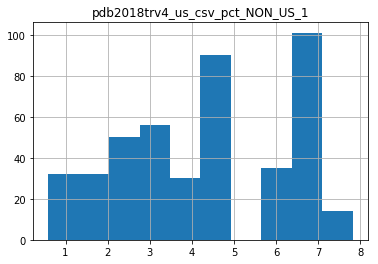

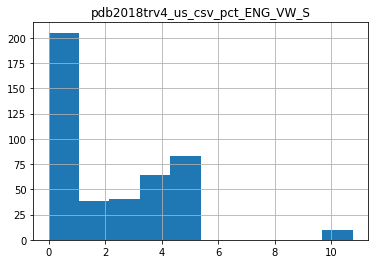

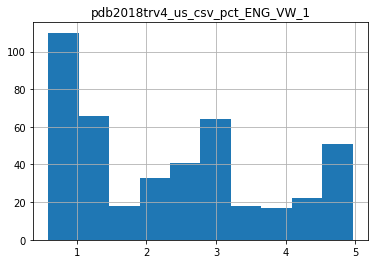

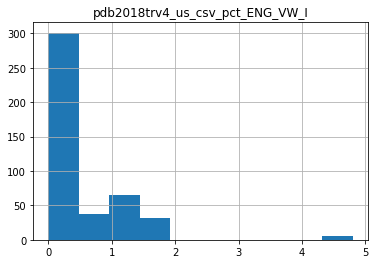

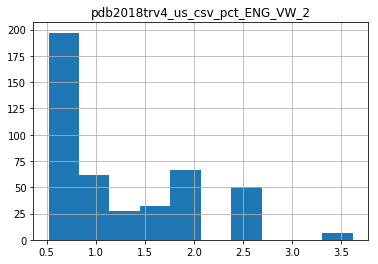

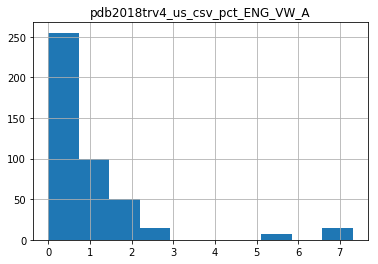

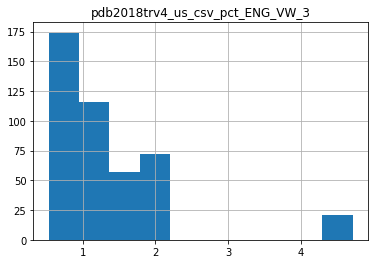

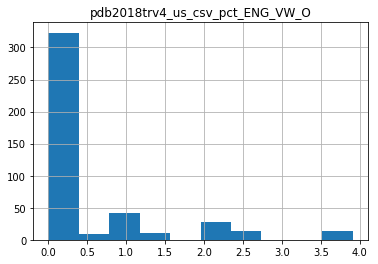

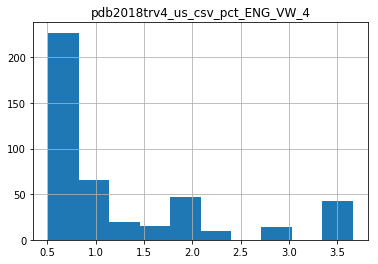

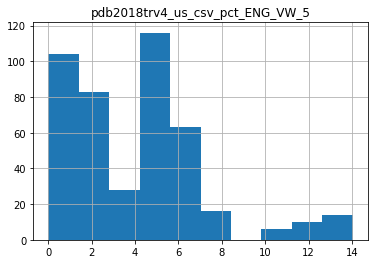

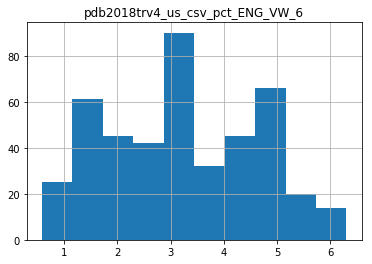

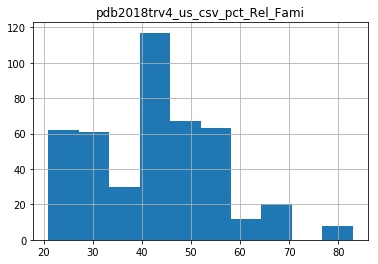

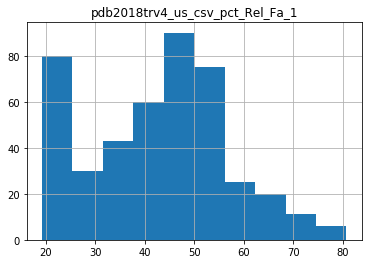

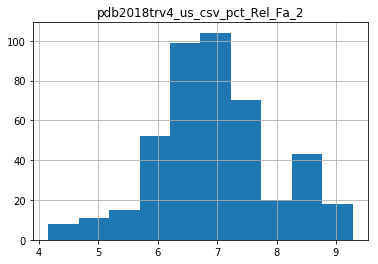

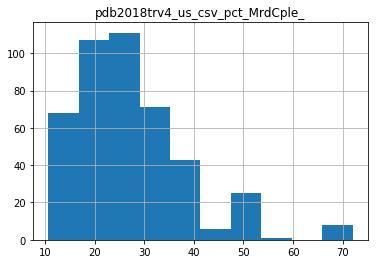

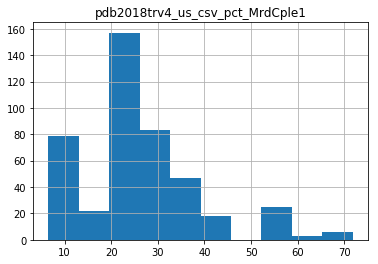

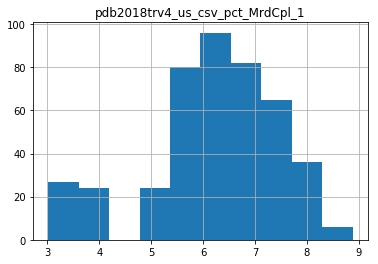

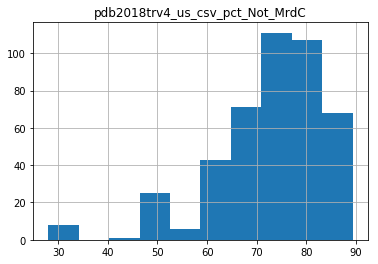

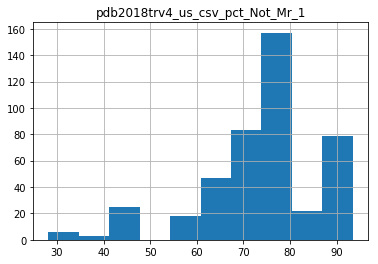

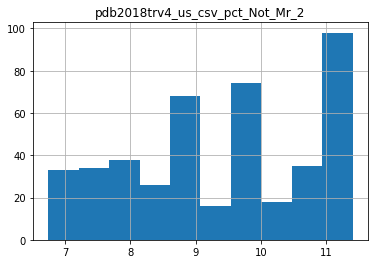

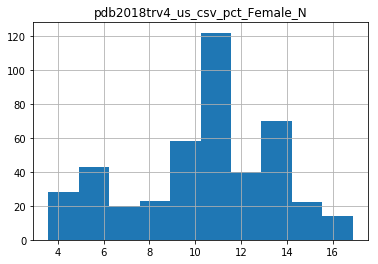

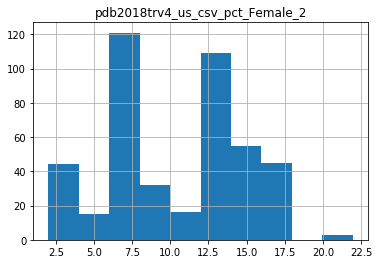

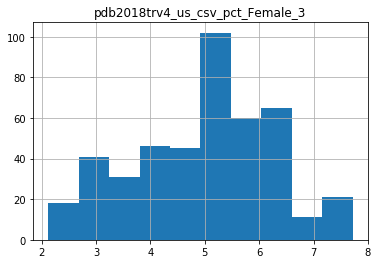

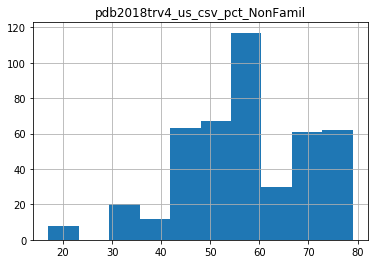

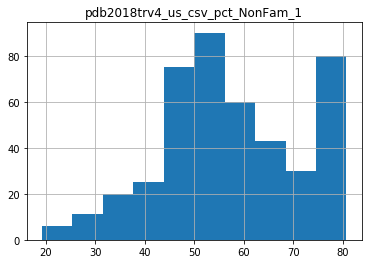

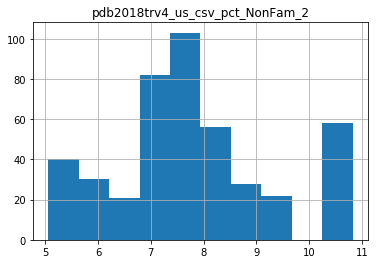

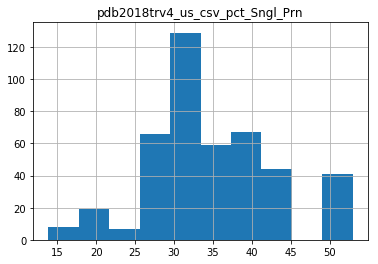

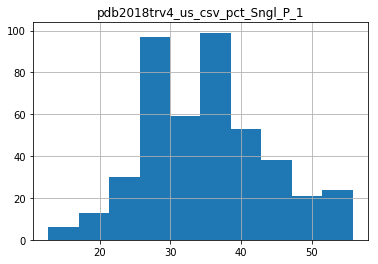

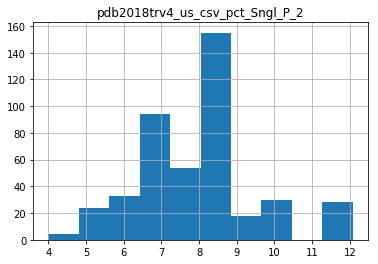

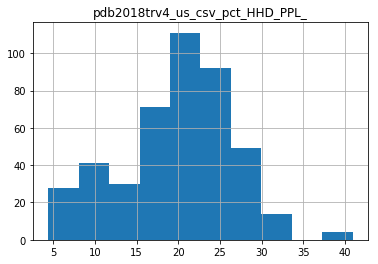

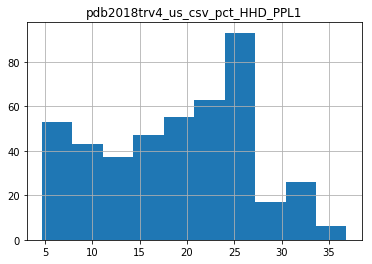

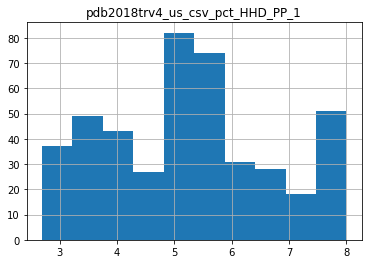

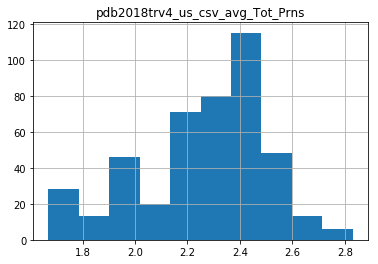

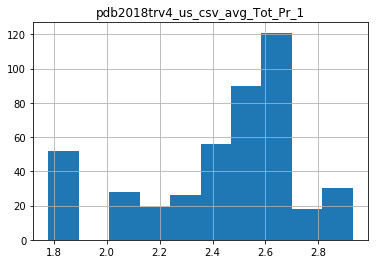

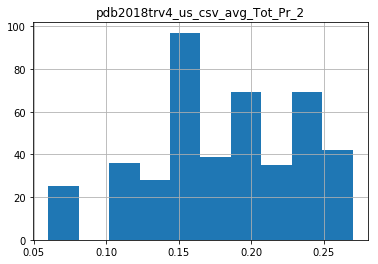

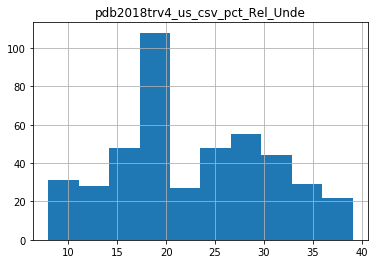

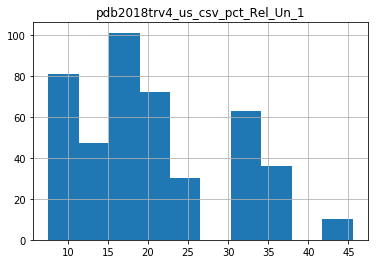

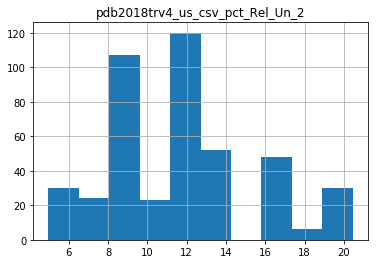

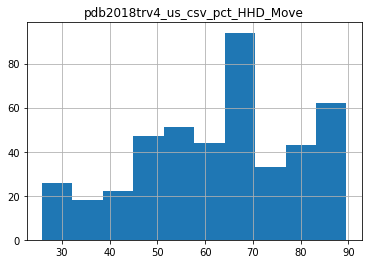

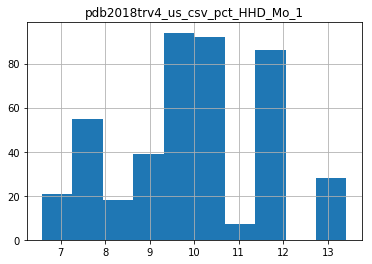

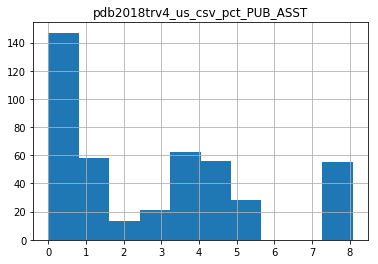

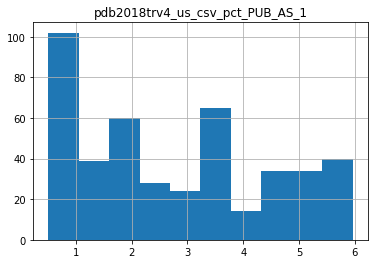

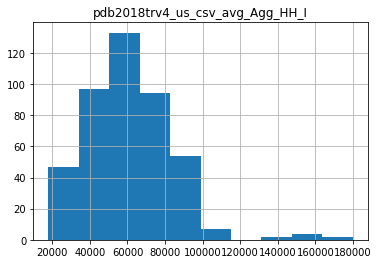

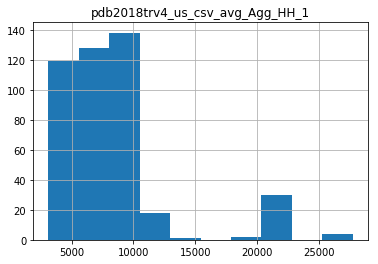

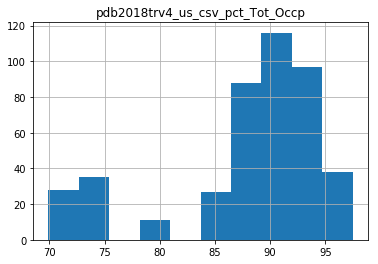

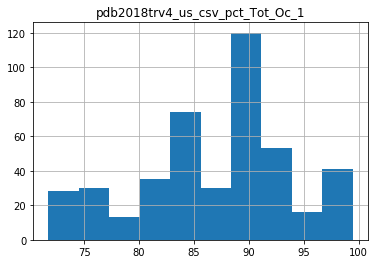

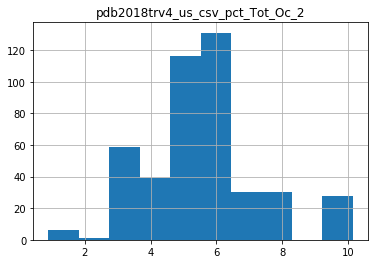

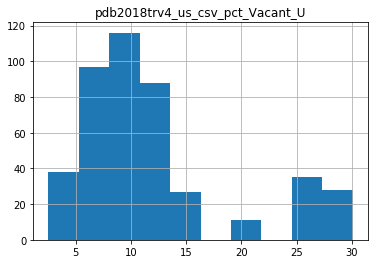

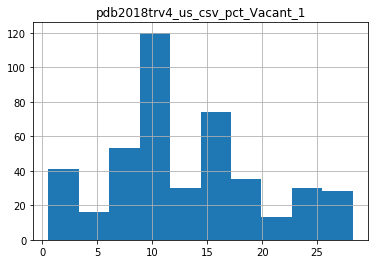

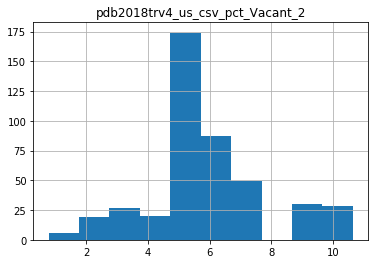

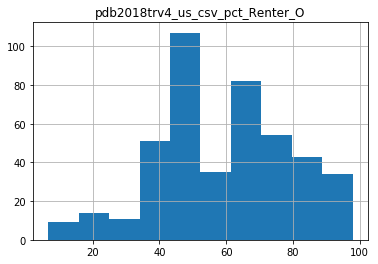

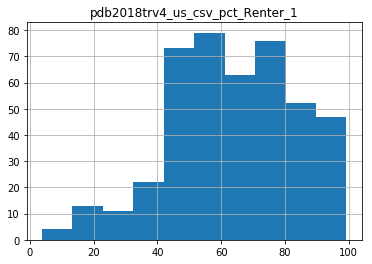

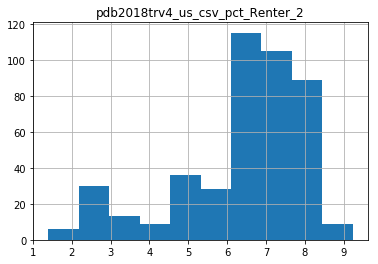

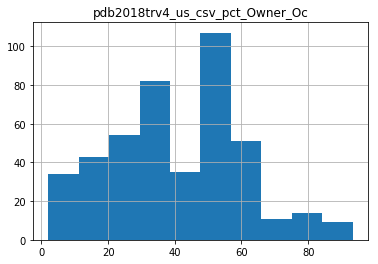

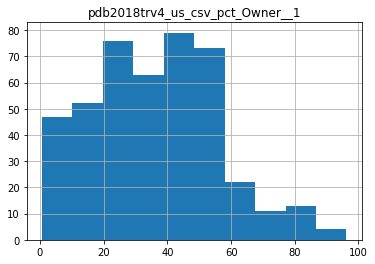

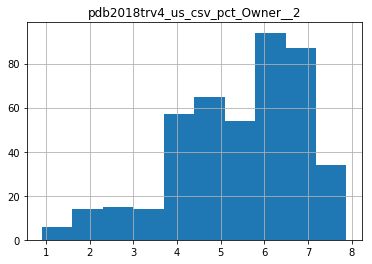

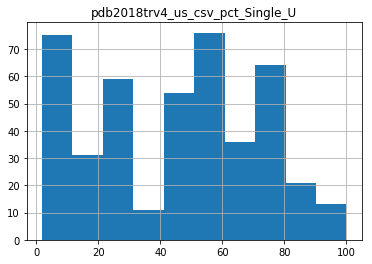

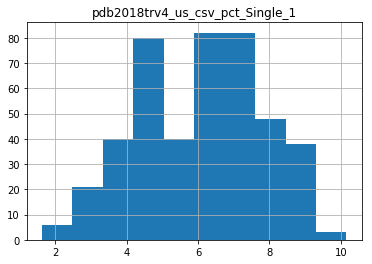

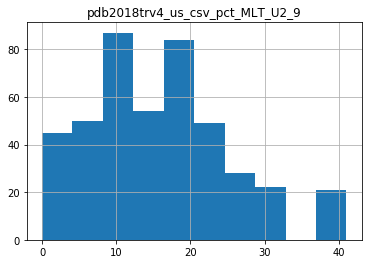

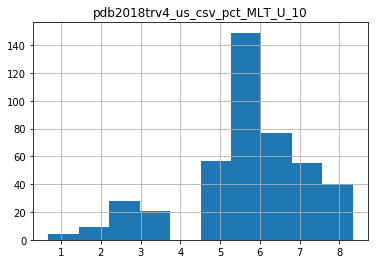

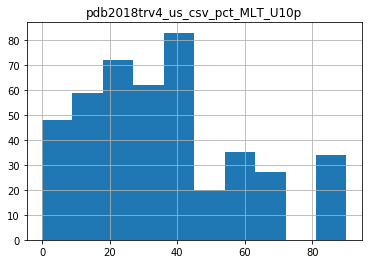

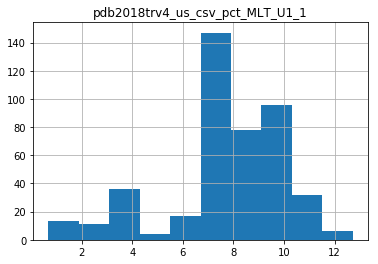

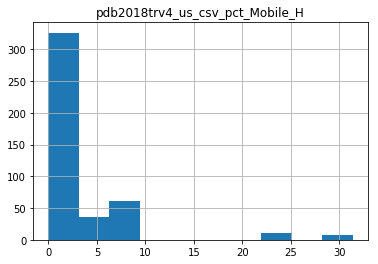

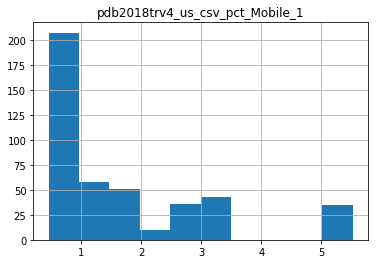

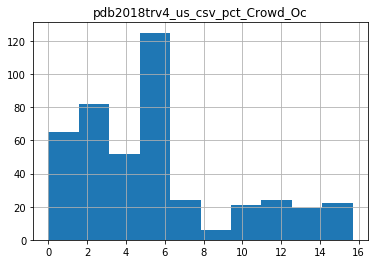

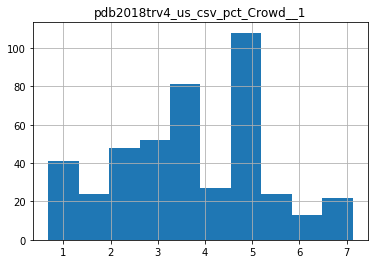

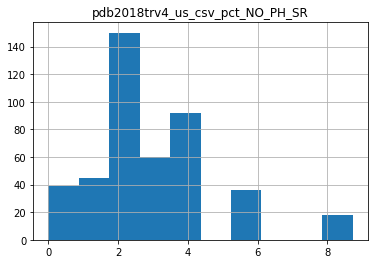

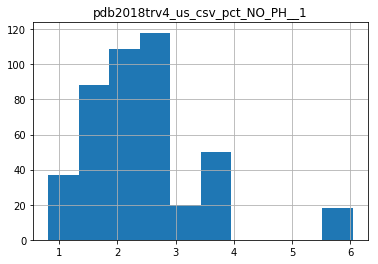

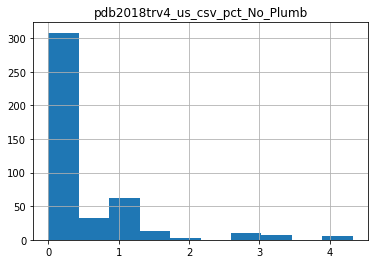

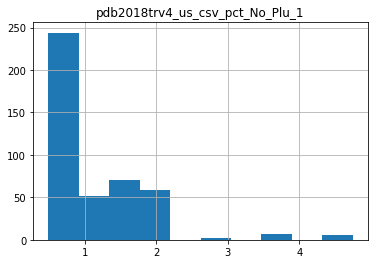

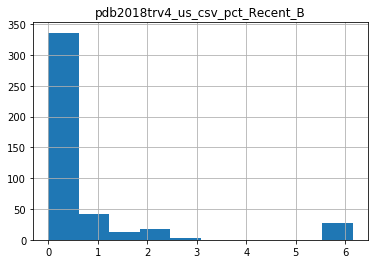

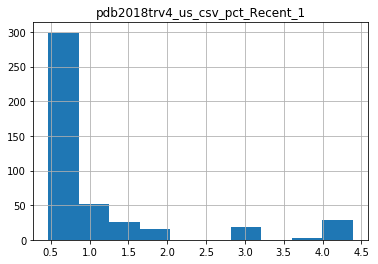

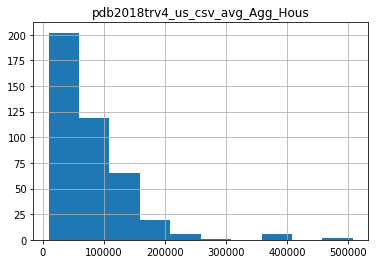

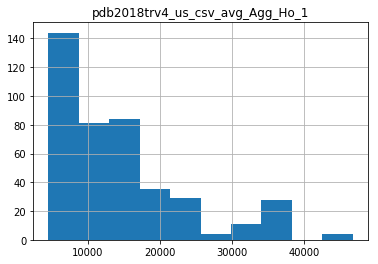

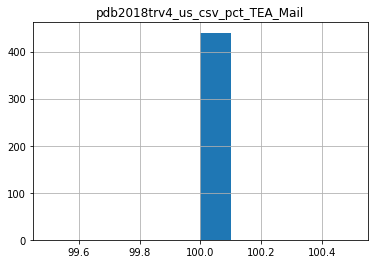

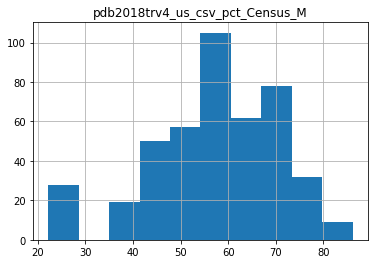

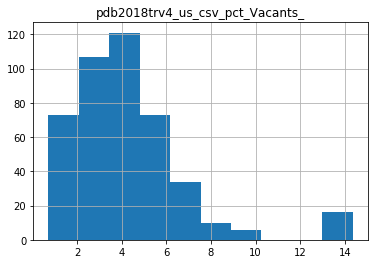

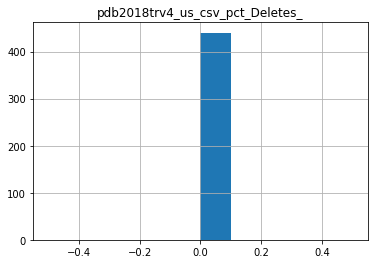

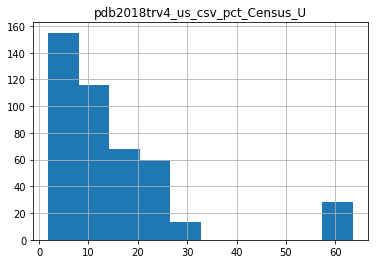

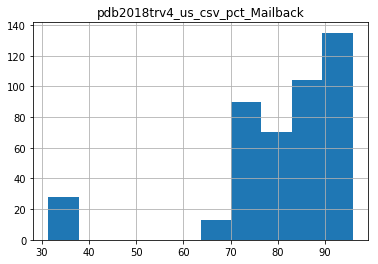

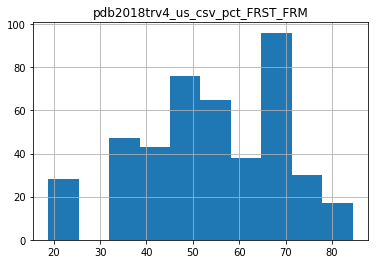

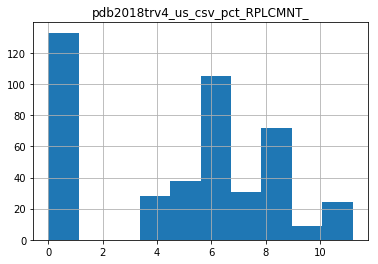

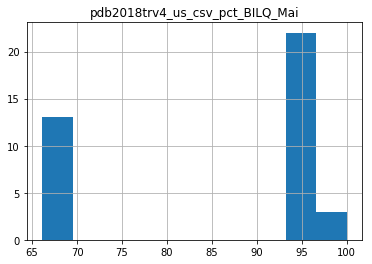

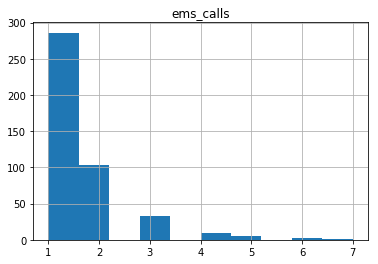

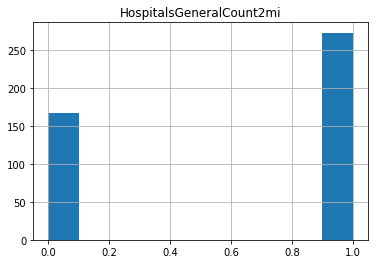

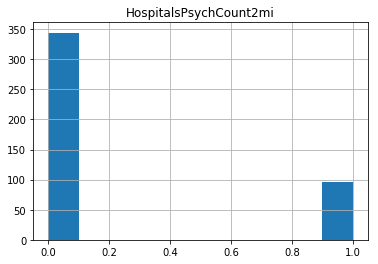

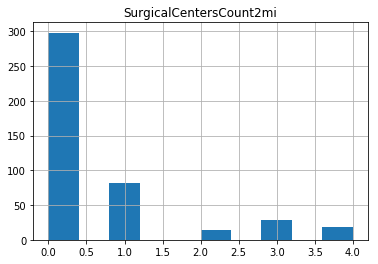

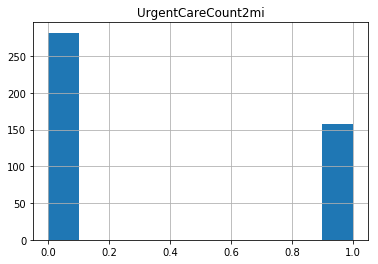

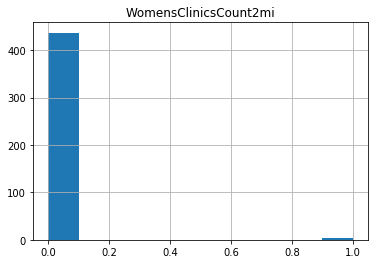

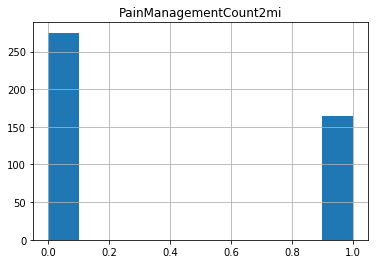

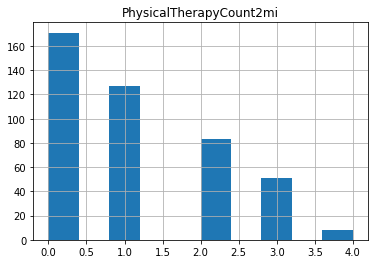

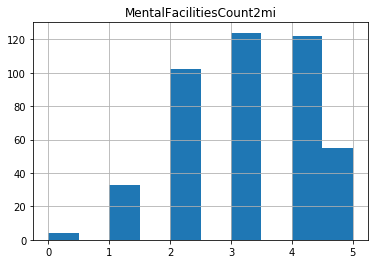

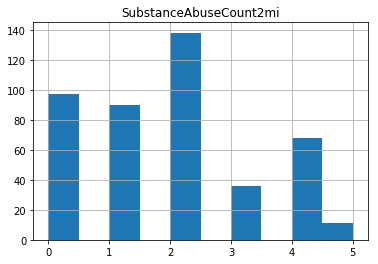

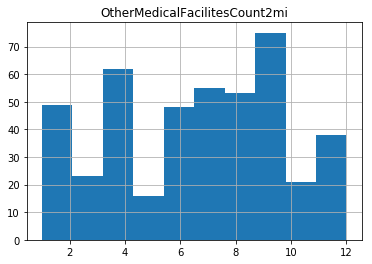

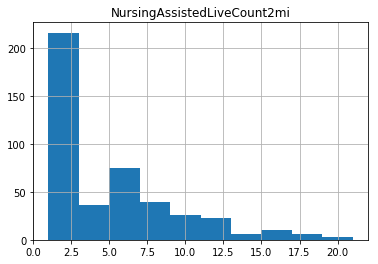

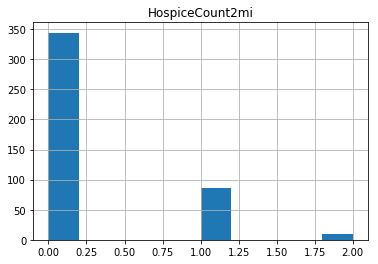

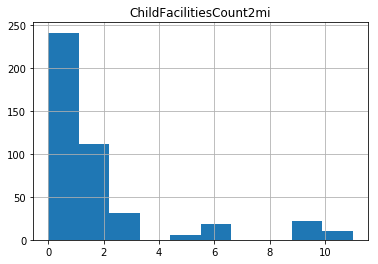

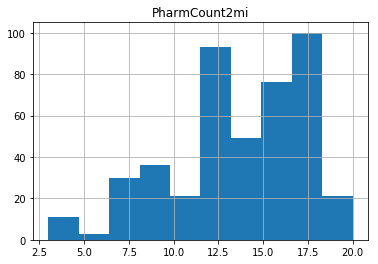

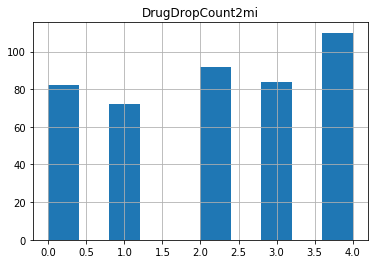

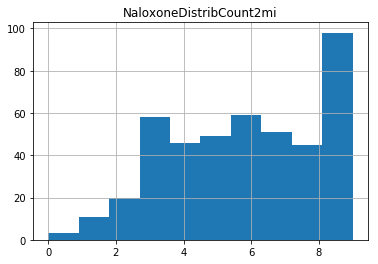

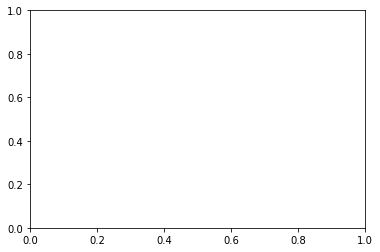

In [21]:
for i in range(len(features)):
    fig, ax = plt.subplots()
    test_shapes[features[i]].hist(ax=ax)
    plt.title(features[i])

### Check Hists with Log Normal Transform

In [35]:
log_transf = test_shapes

In [37]:
log_transf = log_transf.loc[:, (log_transf != 0).any(axis=0)]

In [38]:
log_transf = np.log(log_transf)

/Users/drewgobbi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [41]:
features = log_transf.columns

ValueError: supplied range of [-inf, 6.985641817639208] is not finite

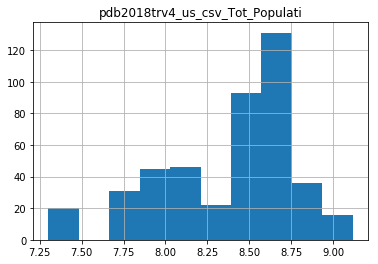

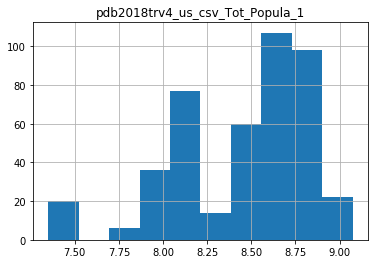

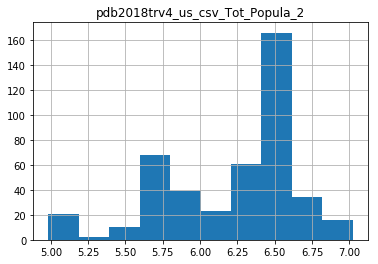

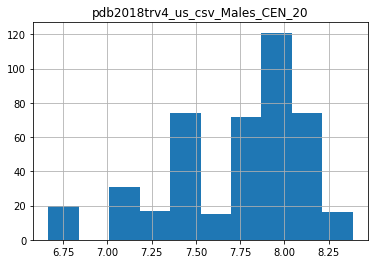

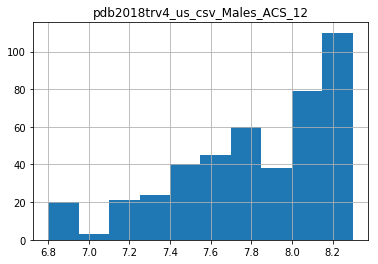

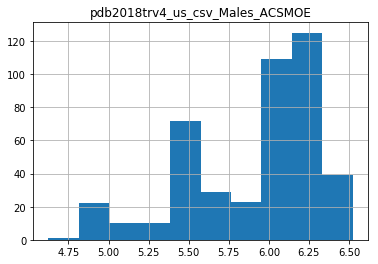

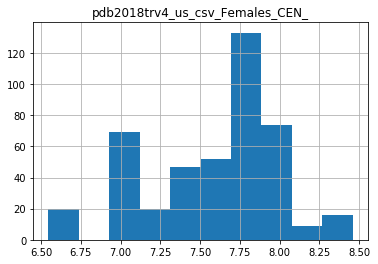

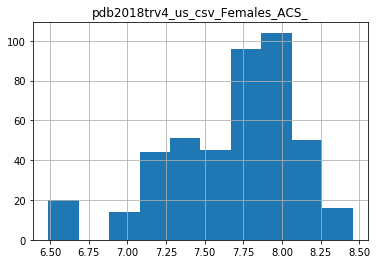

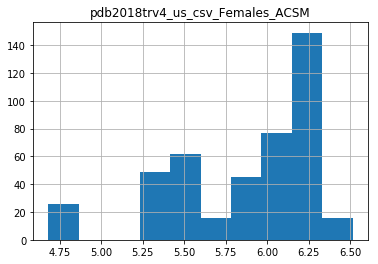

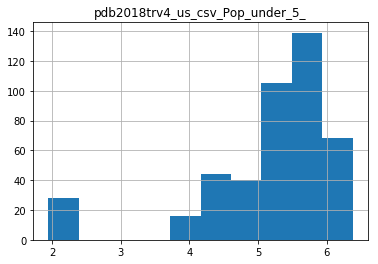

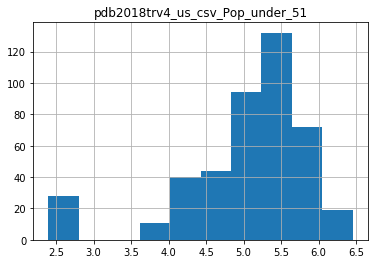

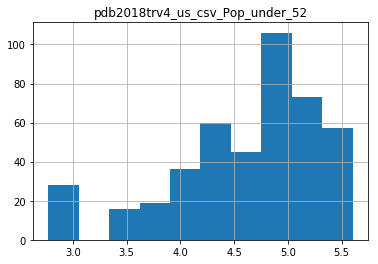

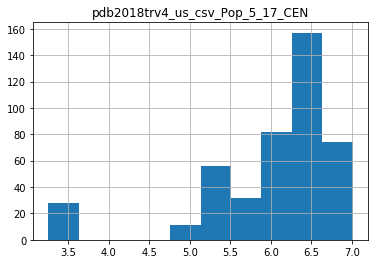

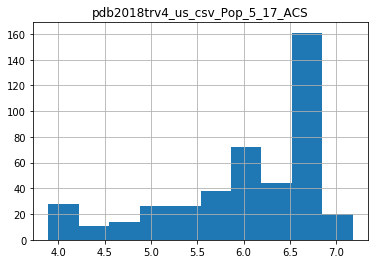

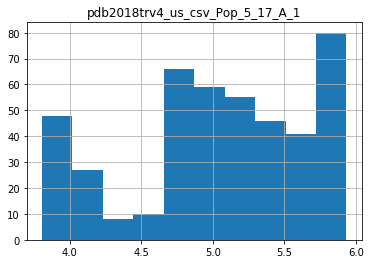

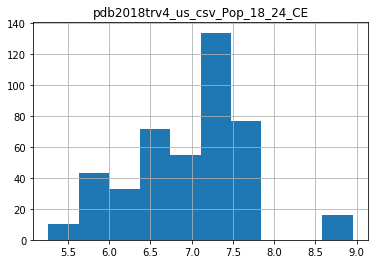

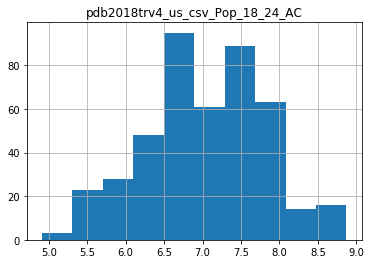

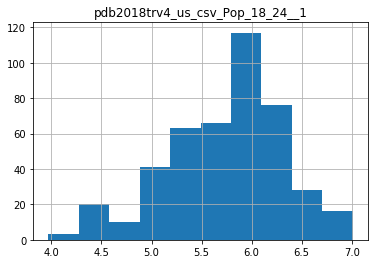

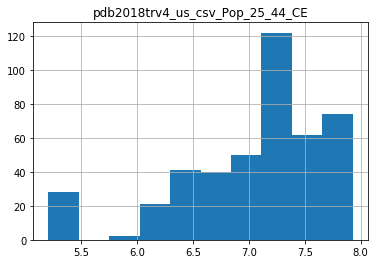

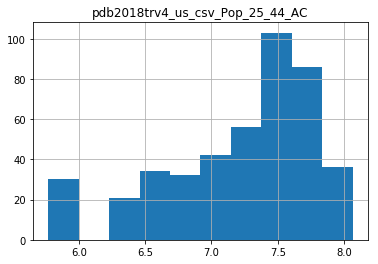

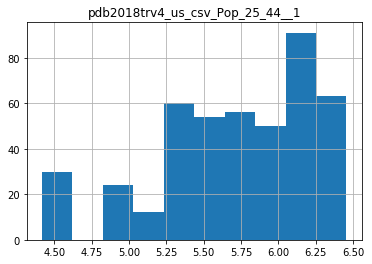

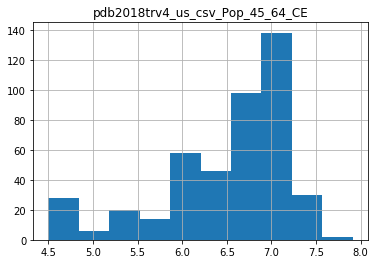

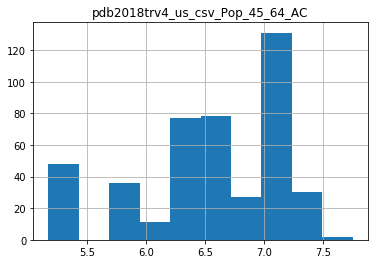

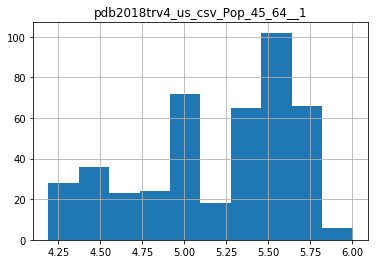

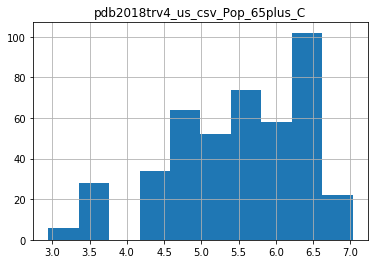

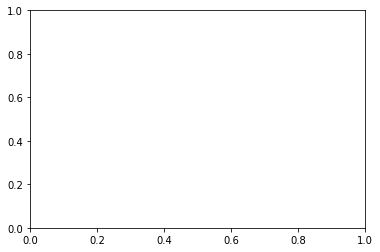

In [42]:
for i in range(len(features)):
    fig, ax = plt.subplots()
    log_transf[features[i]].hist(ax=ax)
    plt.title(features[i])